Adhitia Septian - Capstone Modul 2 - JCDS 1904 Purwadhika


# Exploratory Data Analysis (EDA) 

## Latar Belakang

Pada notebook berisikan pembahasan terkait EDA dengan menggunakan Pakistan's Largest E-Commerce Dataset yang dapat di *download* di link berikut: https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset?resource=download   
Ini adalah dataset data pesanan e-commerce ritel terbesar dari Pakistan. Ini berisi setengah juta catatan transaksi dari Maret 2016 hingga Agustus 2018. Jadi pada notebook ini akan menggali lebih dalam untuk mendapatkan keputusan yang baik untuk perusahaan dalam meningkatkan keuntungan.

## Import Library

In [24]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")


## Rumusan Masalah

- Sebagai seorang Business Owner pasti memerlukan strategi gunanya untuk dapat meningkatkan pelayanan dan penjualan mereka agar dapat bertahan dan bersaing di dunia ecommerce dengan kompetitor. Strategi yang baik dapat menguntungkan perusahaan dan memperbaiki pelayanan yang tepat tentunya dapat bertujuan untuk customer churn( melakukan pembelian berulang ), 

- Analisa khususnya perilaku customer dan hal apa saja yang butuh di tingkatkan, hal ini berguna untuk meningkatkan engagement pengguna dengan aplikasi dan proses checkout barang.


## Memuat Dataset

In [25]:
#import dataset
ecomm = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')
ecomm.head()


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


## Membaca Dataset

### Fitur

Dataset ini berisi informasi terkait seluruh element dari sebuah transaksi. Ada 26 kolom pada Pakistan Largest Ecommerce Dataset yaitu:

1. Item_id : Kode unik dari setiap item
2. Status : Status dari sebuah transaksi
3. Created_at : Tanggal dilakukannya pemesanan barang
4. Sku : Stock Keeping Unit yang diberikan kepada setiap item barang
5. Price : Harga dari setiap item barang
6. Qty_ordered : Jumlah total item barang dalam satu transaksi
7. Grand_total : Jumlah total yang dibayar oleh customer
8. Increment_id : Kode struk
9. Category_name_1 : Pengelompokan setiap item barang dalam satu kategori
10. Sales_commision_code : Kode komisi penjualan
11. Discount_amount : Jumlah diskon yang diberikan
12. Payment_method : Metode pembayaran
13. Working_date : Jam kerja
14. BI_Status : Memberikan informasi terkait kelanjutan proses pemesanan barang
15. MV : Harga satuan produk
16. Year : Tahun customer bergabung
17. Month : Bulan customer bergabung
18. Customer_since : Berisi keterangan waktu saat konsumen bergabung
19. M-Y : Informasi tentang bulan dan tahun terjadinya transaksi
20. FY : Tahun fiskal perusahaan
21. Customer_ID : Kode unik untuk setiap konsumen
22. Unnamed : 21 : Empty Column
23. Unnamed : 22 : Empty Column
24. Unnamed : 23 : Empty Column
25. Unnamed : 24 : Empty Column
26. Unnamed : 25 : Empty Column

In [26]:
# Mengecek 5 data pertama orders
ecomm.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [27]:
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

ecomm.info() digunakan untuk mendapatkan quick insight dari keseluruhan data seperti tipe data pada masing masing kolom dan juga jumlah data yang tidak terhitung sebagai null

## CLEANING AND UNDERSTANDING DATA

#### Menampilkan isi semua data yang terdapat dari kolom, gunanya melihat lebih dalam lagi apakah ada data yang tidak sesuai 

In [28]:
# Menampilkan data unik di tiap kolom

pd.set_option('display.max_colwidth', -1)

listItem = []
for col in ecomm.columns :
    listItem.append( [col, ecomm[col].nunique(), ecomm[col].unique()])

tabelinfo = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabelinfo

,Column Name,Number of Unique,Unique Sample
0,item_id,584524,"[211131.0, 211133.0, 211134.0, 211135.0, 211136.0, 211137.0, 211138.0, 211139.0, 211140.0, 211141.0, 211142.0, 211143.0, 211144.0, 211145.0, 211146.0, 211147.0, 211149.0, 211150.0, 211151.0, 211152.0, 211153.0, 211154.0, 211155.0, 211156.0, 211157.0, 211158.0, 211160.0, 211162.0, 211163.0, 211164.0, 211166.0, 211168.0, 211169.0, 211170.0, 211171.0, 211172.0, 211173.0, 211174.0, 211175.0, 211176.0, 211177.0, 211179.0, 211180.0, 211182.0, 211184.0, 211185.0, 211186.0, 211187.0, 211188.0, 211189.0, 211190.0, 211191.0, 211192.0, 211193.0, 211194.0, 211196.0, 211197.0, 211198.0, 211199.0, 211200.0, 211202.0, 211201.0, 211203.0, 211204.0, 211205.0, 211206.0, 211207.0, 211208.0, 211209.0, 211211.0, 211212.0, 211213.0, 211214.0, 211215.0, 211217.0, 211218.0, 211219.0, 211220.0, 211221.0, 211222.0, 211223.0, 211225.0, 211224.0, 211226.0, 211227.0, 211228.0, 211229.0, 211230.0, 211231.0, 211232.0, 211233.0, 211234.0, 211235.0, 211236.0, 211237.0, 211238.0, 211239.0, 211240.0, 211241.0, 211242.0, ...]"
1,status,16,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, \N, cod, pending, nan, processing, payment_review]"
2,created_at,789,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/2016, 7/11/2016, 7/12/2016, 7/13/2016, 7/14/2016, 7/15/2016, 7/16/2016, 7/17/2016, 7/18/2016, 7/19/2016, 7/20/2016, 7/21/2016, 7/22/2016, 7/23/2016, 7/24/2016, 7/25/2016, 7/26/2016, 7/27/2016, 7/28/2016, 7/29/2016, 7/30/2016, 7/31/2016, 8/1/2016, 8/2/2016, 8/3/2016, 8/4/2016, 8/5/2016, 8/6/2016, 8/7/2016, 8/8/2016, 8/9/2016, 8/10/2016, 8/11/2016, 8/12/2016, 8/13/2016, 8/14/2016, 8/15/2016, 8/16/2016, 8/17/2016, 8/18/2016, 8/19/2016, 8/20/2016, 8/21/2016, 8/22/2016, 8/23/2016, 8/24/2016, 8/25/2016, 8/26/2016, 8/27/2016, 8/28/2016, 8/29/2016, 8/30/2016, 8/31/2016, 9/1/2016, 9/2/2016, 9/3/2016, 9/4/2016, 9/5/2016, 9/6/2016, 9/7/2016, 9/8/2016, 9/9/2016, 9/10/2016, 9/11/2016, 9/12/2016, 9/13/2016, 9/14/2016, 9/15/2016, 9/16/2016, 9/17/2016, 9/18/2016, 9/19/2016, 9/20/2016, 9/21/2016, 9/22/2016, 9/23/2016, 9/24/2016, 9/25/2016, 9/26/2016, 9/27/2016, 9/28/2016, 9/29/2016, 9/30/2016, 10/1/2016, 10/2/2016, 10/3/2016, 10/4/2016, 10/5/2016, 10/6/2016, 10/7/2016, 10/8/2016, ...]"
3,sku,84889,"[kreations_YI 06-L, kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free, Ego_UP0017-999-MR0, kcc_krone deal, BK7010400AG, UK_Namkino All In One 200 Gms, UK_Namkino Mix Nimco 400 Gms, Apple iPhone 6S 64GB, GFC_Pedestal Myga Cross Base (Special Guard) 24"", BK1070200PL, BK1130200CF, kcc_Sultanat, kcc_glamour deal, Assetmen_MD-346-M, cr_DATES WITH CASHEW-400 GM, UK_Gift Box Mix Dry Fruit Sweets 500 Gms, itter_AB 1199, RL_B005, bed&rest_S7, L&L_LLHLE8224S, J&J_JJR-4, J&J_JJR-20, D Lend a Helping Hand, Mochika_M0001112-12, Mochika_M0001112-8, SKMT_Blood Test, SKMT_Medicine, sputnik_701/5-11, Ctees-Black Zip- Up Hoodie-XL, Samsung Galaxy J5, Veet_4, RS_Gulab jaman Tin, cr_PEANUT SALTY-200 GM, Oriflame_21557, JBS_TAT-128, Ajmery_BRR-590-M, HOS_GUCFW75, Lexon_LL116B-Blue, kcc_Fantasy Perfumed Talcum Powder-200gm, 2Zee_SC6, Q MOBILE Noir X20, rehaab_RJ160047, Farah_3-B, RS_Sohan Halwa Tin, UK_Soan Papdi Original 250 Gms, UK_Gift Box Soghaat 500 Gms, RS_Double Delight, Al Muhafiz Sohan Halwa Almond, UK_Gift Box Baklawa 500 Gms, sputnik_2146/6-8, kkc_Kingtox 450ml Classic Green All Insect Killer Spray, Al Muhafiz Sohan Halwa Walnut, RS_Honey Dry Fruit Halwa, itter_AB 1214, Eco Star_40U557, Orient_OR-6057 GX LGFD LV, HOS_JPGCW100, kkc_Jasmine King Air Freshener, asimjofaeanew_5A, ajmery_F9-981, hijabh_JILBAB-C (1)-52x, noritake_NTM163M, RS_Habshi Halwa Tin, sentiments_WRK1612, bata_comfit-8613714-43-9, UK_Namkino Mix Nimco 8 Pcs Gift Pack, Inoxy_Inoxy Hair Miracle Elixir, RS_Chum Chum Tin, Dany_AUK-650 , urban_ PT004-L, jackpot_JP-7999, UK_Gift Box Pistachio Delight 500 Gms, test_tcsconnect, sst_Lyquin-Regular fit-Large, 

#### Mengecek informasi jumlah kolom dan baris dari dataset

In [29]:
print(f'Jumlah baris pada dataset ini berjumlah {ecomm.shape[0]}')
print(f'Jumlah kolom pada dataset ini berjumlah {ecomm.shape[1]}')

Jumlah baris pada dataset ini berjumlah 1048575
Jumlah kolom pada dataset ini berjumlah 26


#### Melihat jumlah data yang missing value atau kosong

In [30]:
# check missing value
ecomm.isna().sum()

item_id                  464051 
status                   464066 
created_at               464051 
sku                      464071 
price                    464051 
qty_ordered              464051 
grand_total              464051 
increment_id             464051 
category_name_1          464215 
sales_commission_code    601226 
discount_amount          464051 
payment_method           464051 
Working Date             464051 
BI Status                464051 
 MV                      464051 
Year                     464051 
Month                    464051 
Customer Since           464062 
M-Y                      464051 
FY                       464051 
Customer ID              464062 
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

#### Melihat persentase nilai kosong dari setiap kolom 

In [31]:
# Melihat persentase missing value dari setiap kolom
ecomm.isnull().sum()/ecomm.shape[0]*100

item_id                  44.255394 
status                   44.256825 
created_at               44.255394 
sku                      44.257302 
price                    44.255394 
qty_ordered              44.255394 
grand_total              44.255394 
increment_id             44.255394 
category_name_1          44.271034 
sales_commission_code    57.337434 
discount_amount          44.255394 
payment_method           44.255394 
Working Date             44.255394 
BI Status                44.255394 
 MV                      44.255394 
Year                     44.255394 
Month                    44.255394 
Customer Since           44.256443 
M-Y                      44.255394 
FY                       44.255394 
Customer ID              44.256443 
Unnamed: 21              100.000000
Unnamed: 22              100.000000
Unnamed: 23              100.000000
Unnamed: 24              100.000000
Unnamed: 25              100.000000
dtype: float64

Secara umum, kita bisa melihat bahwa:

- Dataset Pakistan Largest Ecommerce Dataset memiliki 26 kolom dan 1048575 baris, dan menghabiskan memory sekitar 208Mb,
- Sejumlah kolom memiliki data kosong, yaitu, status, sku, category_name_1, sales_commission_code, Customer Since, dan Customer ID,
- Kolom BI Status memiliki nilai yang tidak sesuai,
- Kolom Unnamed berisikan nilai kosong seluruhnya, sehingga melakukan penghapusan adalah keputusan terbaik,
- Kolom created_at memiliki data tipe object. Namun setelah melihat nilai pada kolom ini, seharusnya berisikan data datetime,
- Terdapat spasi pada kolom MV, sehingga dapat diperbaiki untuk penamaan kolom.

Menghapus kolom yang bernilai kosong yang tidak berkaitan dengan analisa data

In [32]:
# Melakukan penghapusan kolom yang bernilai kosong
ecomm.drop(columns=['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'], inplace=True)

Merubah nama kolom MV yang sebelumnya ' MV '( adanya spasi didepan dan setelahnya ) menjadi 'MV'( tanpa spasi ) untuk meminimalisir kesalahan pada saat analisis data

In [33]:
# Melakukan perubahan nama kolom ` MV`
ecomm.rename(columns={' MV ':'MV'},inplace=True)

Merubah seluruh spasi ' '  pada nama kolom menjadi underscore '_' untuk memudahkam pemrogaman agar tidak terjadi kesalahan pada analisis data

In [34]:
# Merubah seluruh spasi(' ') pada nama kolom menjadi underscore('_')
ecomm.columns=ecomm.columns.str.replace(' ','_')

Merubah kolom 'category_name_1' menjadi 'category' untuk memudahkan membaca data

In [35]:
# Melakukan perubahan nama kolom `category`
ecomm.rename(index=str, columns={'category_name_1': 'category'}, inplace=True)

Merubah isi tipe data kolom 'created_at' menjadi datetime agar mudah dalam pemrograman dan membaca data

In [36]:
# Merubah tipe data kolom `created_at` menjadi datetime
ecomm['created_at'] = pd.to_datetime(ecomm.created_at, format='%m/%d/%Y')

Menampilkan seluruh unique data pada isi kolom 'status' untuk melihat apakah ada isi data yang berbeda atau penyelarasan

In [37]:
# Menampilkan seluruh elemen unik pada kolom `status`
ecomm['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', nan, 'processing', 'payment_review'],
      dtype=object)

Bisa dilihat dari isi dari kolom status ada beberapa yang serupa, maka dari itu kita melakukan pengelompokan/penyelarasan transaksi isi kolom dari status untuk memudahkan pemrograman

In [38]:
# Melakukan pengelompokan transaksi pada nilai dari kolom `status`
replace_status = {'received':'complete', 'exchange':'complete', 'paid':'pending','cod':'complete'
                  ,'payment_review':'pending','processing':'pending','payment_review':'pending','refund':'order_refunded', 'pending_paypal':'pending',
                  'closed':'canceled','refund':'order_refunded', 'pending_paypal':'order_refunded',
                 'fraud':'canceled', 'holded':'pending'} 
ecomm = ecomm.replace({"status": replace_status})

Menampilkan semua isi data dari kolom status yang sudah di rubah atau di kelompokan

In [39]:
# Menampilkan seluruh elemen unik pada kolom `status`
ecomm['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'pending', '\\N', nan],
      dtype=object)

Menampilkan seluruh data unique dari kolom 'payment_method' agar bisa di analisa apakah ada ketidakseragaman atau keanehan

In [40]:
# Menampilkan seluruh elemen unik pada kolom `payment_method`
ecomm['payment_method'].unique()

array(['cod', 'ublcreditcard', 'mygateway', 'customercredit',
       'cashatdoorstep', 'mcblite', 'internetbanking', 'marketingexpense',
       'productcredit', 'financesettlement', 'Payaxis', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah', 'apg', nan], dtype=object)

Dapat dianalisis pada isi kolom 'payment_method' bahwa beberapa nilai pada kolom memiliki makna yang menyerupai seperti Easypay_MA, easypay_voucher dan Easypay. Oleh karena itu kita kelompokan kembali untuk menyederhanakan analisis

In [41]:
# Melakukan pengelompokan data pada nilai dari kolom `payment_method`
payment_to_replace = {'cashatdoorstep': 'cod', 'Easypay_MA':'Easypay', 'easypay_voucher':'Easypay','jazzwallet':'jazz','jazzvoucher':'jazz'} 
ecomm = ecomm.replace({"payment_method": payment_to_replace})

Menampilkan seluruh data unique dari kolom 'payment_method' yang sudah di kelompokan 

In [42]:
# Menampilkan seluruh isi data unique pada kolom `payment_method`
ecomm['payment_method'].unique()

array(['cod', 'ublcreditcard', 'mygateway', 'customercredit', 'mcblite',
       'internetbanking', 'marketingexpense', 'productcredit',
       'financesettlement', 'Payaxis', 'jazz', 'Easypay', 'bankalfalah',
       'apg', nan], dtype=object)

## DATA DUPLIKAT
Data duplikat merupakan baris data yang memiliki nilai yang sama satu sama lain. Oleh karena itu perlu dilakukan pemeriksaan menyeluruh untuk menghindari adanya data duplikat

In [43]:
# Memeriksa jumlah duplikat pada setiap kolom
ecomm.duplicated().sum()

464050

In [44]:
# Melakukan akses baris data yang terindikasi duplikat
print(ecomm[ecomm.duplicated(keep=False)])

         item_id status created_at  sku  price  qty_ordered  grand_total  \
584524  NaN       NaN   NaT         NaN NaN    NaN          NaN            
584525  NaN       NaN   NaT         NaN NaN    NaN          NaN            
584526  NaN       NaN   NaT         NaN NaN    NaN          NaN            
584527  NaN       NaN   NaT         NaN NaN    NaN          NaN            
584528  NaN       NaN   NaT         NaN NaN    NaN          NaN            
...      ..       ...    ..         ...  ..     ..           ..            
1048570 NaN       NaN   NaT         NaN NaN    NaN          NaN            
1048571 NaN       NaN   NaT         NaN NaN    NaN          NaN            
1048572 NaN       NaN   NaT         NaN NaN    NaN          NaN            
1048573 NaN       NaN   NaT         NaN NaN    NaN          NaN            
1048574 NaN       NaN   NaT         NaN NaN    NaN          NaN            

        increment_id category sales_commission_code  ...  payment_method  \
584524   Na

Dapat dilihat bahwa sangat banyak baris data yang bernilai kosong pada setiap kolomnya, dengan menghapus baris data ini maka tidak hanya dapat menghapus data duplikat tapi juga mengatasi baris data bernilai kosong

In [45]:
# Melakukan penghapusan pada baris data yang bernilai kosong pada setiap kolomnya
ecomm_new = ecomm.dropna(how = 'all')

Mengecek isi data dari kolom yang sudah di hapus

In [46]:
# menampilkan data frame baru yang sudah di hapus data yg bernilai kosong
print(ecomm_new[ecomm_new.duplicated(keep=False)])

Empty DataFrame
Columns: [item_id, status, created_at, sku, price, qty_ordered, grand_total, increment_id, category, sales_commission_code, discount_amount, payment_method, Working_Date, BI_Status, MV, Year, Month, Customer_Since, M-Y, FY, Customer_ID]
Index: []

[0 rows x 21 columns]


In [47]:
# Menampilkan ringkasan data yang telah dirubah
ecomm_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  float64       
 1   status                 584509 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  float64       
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category               584360 non-null  object        
 9   sales_commission_code  447349 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working_Date           584524 non-null  object   

### MISSING VALUE
Missing Value merupakan nilai kosong dalam data. Oleh karena itu perlu dilakukan pemeriksaan menyeluruh untuk menghindari adanya data bernilai kosong.

In [48]:
# persentase missing value di tiap kolom
ecomm_new.isna().sum()/ecomm_new.shape[0]*100

item_id                  0.000000 
status                   0.002566 
created_at               0.000000 
sku                      0.003422 
price                    0.000000 
qty_ordered              0.000000 
grand_total              0.000000 
increment_id             0.000000 
category                 0.028057 
sales_commission_code    23.467813
discount_amount          0.000000 
payment_method           0.000000 
Working_Date             0.000000 
BI_Status                0.000000 
MV                       0.000000 
Year                     0.000000 
Month                    0.000000 
Customer_Since           0.001882 
M-Y                      0.000000 
FY                       0.000000 
Customer_ID              0.001882 
dtype: float64

Dari hasil analisa di atas, terdapat 6 kolom yang memiliki nilai kosong dimana sales_commission_code menjadi kolom dengan presentase nilai kosong yang sangat tinggi. Mari kita lihat jumlah tepat dari nilai kosong pada setiap kolom.

In [49]:
# Melihat berapa jumlah missing value yang ada di kolom dataframe
ecomm_new.isnull().sum()

item_id                  0     
status                   15    
created_at               0     
sku                      20    
price                    0     
qty_ordered              0     
grand_total              0     
increment_id             0     
category                 164   
sales_commission_code    137175
discount_amount          0     
payment_method           0     
Working_Date             0     
BI_Status                0     
MV                       0     
Year                     0     
Month                    0     
Customer_Since           11    
M-Y                      0     
FY                       0     
Customer_ID              11    
dtype: int64

bisa di analisa disini bahwa ada beberapa data di dalam kolom yang tidak bernilai atau missing value yaitu :
1. status
2. sku
3. category
4. sales_commission_code
5. Customer_Since
6. Customer_ID

### STATUS

In [50]:
# mencetak seluruh baris dengan missing value pada kolom status
print(ecomm_new[ecomm_new['status'].isnull()])

         item_id status created_at                              sku    price  \
477519  783751.0  NaN   2018-03-15  OTHPCB5A7D8A0BD10E8              8000.0    
513736  827187.0  NaN   2018-04-16  KABOXF5ABCC75C7E2F7-32           370.0     
513737  827189.0  NaN   2018-04-16  KABSHO5AA77C331466F-11-13 Years  473.0     
513738  827191.0  NaN   2018-04-16  KABBIN5A93E074C501A-8-9 Years    749.0     
513739  827193.0  NaN   2018-04-16  KABLIT59AC117FD51C4-12-13 Years  692.0     
513740  827195.0  NaN   2018-04-16  KABCOL5AB2B8019805C-8-9 Years    423.0     
518706  832777.0  NaN   2018-04-30  ENTCLI5A5DD7D800D6E              6042.0    
532965  848003.0  NaN   2018-05-14  MATINF5AE310D2D7A1A              13950.0   
542146  857829.0  NaN   2018-05-25  ROO5AE983F2751EA                 2280.0    
554962  872154.0  NaN   2018-06-15  BAGPHI5AA665985A58E              2900.0    
556575  873867.0  NaN   2018-06-20  SEH59F33B639C948                 13998.0   
562052  879771.0  NaN   2018-07-02  MEFT

In [51]:
ecomm_new['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'pending', '\\N', nan],
      dtype=object)

dari tampilan data diatas bisa di lihat bahwa isi data dari kolom status ada yang kosong atau nan dan juga ada \\N, sehingga sulit untuk dianalisa. Oleh karena itu kita rubah menjadi menjadi missing Value

kita akan rubah terlebih dahulu data berupa \\N menjadi data kosong

In [52]:
# Merubah seluruh nilai `\N` menjadi missing value
ecomm_new['status']=ecomm_new['status'].replace({'\\N' : np.NaN})

Kita memiliki asumsi bahwa apabila status pada sistem tidak teridentifikasi maka transaksi dibatalkan

In [53]:
# Mengisi seluruh nilai kosong dengan 'canceled'
ecomm_new.fillna({'status':'canceled'},inplace=True)

menampilkan semua isi data dari kolom status yang baru

In [54]:
ecomm_new['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'pending'], dtype=object)

### SKU


dalam data frame terdapat kolom yang bernama sku dan didalam kolom sku terdapat missing value

In [55]:
# Mencetak seluruh missing value pada kolom `sku`
sku_null = pd.isnull(ecomm['sales_commission_code'])
ecomm_new[sku_null]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
135887,381711.0,complete,2017-01-04,jockey_J260-1013-3-M,715.0,1.0,1714.0,100256851,Men's Fashion,NaN,...,cod,1/4/2017,Net,715,2017.0,1.0,2016-10,1-2017,FY17,11660.0
135888,381713.0,complete,2017-01-04,BO_nonRC-Jeep-Silver,250.0,1.0,1714.0,100256851,Kids & Baby,NaN,...,cod,1/4/2017,Net,250,2017.0,1.0,2016-10,1-2017,FY17,11660.0
135889,381714.0,complete,2017-01-04,aybeez_ABZ-3338-M,299.0,1.0,1714.0,100256851,Men's Fashion,NaN,...,cod,1/4/2017,Net,299,2017.0,1.0,2016-10,1-2017,FY17,11660.0
135890,381716.0,complete,2017-01-04,PC_3P COMBED-008,450.0,1.0,1714.0,100256851,Men's Fashion,NaN,...,cod,1/4/2017,Net,450,2017.0,1.0,2016-10,1-2017,FY17,11660.0
281723,557053.0,complete,2017-08-10,JSM_JSM-003-ComboGreenWhitePakShirt-M,180.0,2.0,360.0,100345578,\N,NaN,...,cod,8/10/2017,Net,360,2017.0,8.0,2016-11,8-2017,FY18,17022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,complete,2018-08-28,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,...,cod,8/28/2018,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,pending,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,pending,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,pending,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0


Dikarenakan oleh kolom yang berisi data nominal maka salah satu pengisian nilai kosong yang dapat dilakukan adalah metode forward fill agar tidak mempengaruhi analisis secara signifikan.
Forward fill adalah suatu teknik pengisian data pada sebuah tabel dimana nilai dari suatu data yang hilang akan diisi dengan nilai dari baris sebelumnya atau setelahnya. Ini biasanya digunakan untuk mengisi data yang hilang dalam serangkaian waktu atau observasi untuk mengurangi jumlah missing values.

In [56]:
# Mengisi seluruh nilai kosong menggunakan metode forward fill
ecomm_new['sku'].fillna(method='ffill',inplace=True)

In [57]:
# mengecek apakah masih ada misising value pada kolom 'sku'
sku_mv = ecomm_new['sku'].isnull().sum()
print(sku_mv)

0


In [58]:
# melihat isi kolom dari 'sku'
sku_null = ecomm_new[['sku']]
print(sku_null)

                                                                sku
0       kreations_YI 06-L                                          
1       kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free
2       Ego_UP0017-999-MR0                                         
3       kcc_krone deal                                             
4       BK7010400AG                                                
...             ...                                                
584519  WOFSCE5AE00357AECDE                                        
584520  MATHUA5AF70A7D1E50A                                        
584521  MATSAM5B6D7208C6D30                                        
584522  MATSAM5B1509B4696EA                                        
584523  MATSAM5B10F91A9B6AB                                        

[584524 rows x 1 columns]


semua isi kolom dari sku sudah berubah yang sebelumnya tidak ada value 

### CATEGORY

kemudian kita akan mengatasi nilai kosong pada kolom category

In [59]:
# Mencetak seluruh missing value pada kolom `category`
category_null = pd.isnull(ecomm['category'])
ecomm_new[category_null]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
425895,725194.0,order_refunded,2018-01-02,MEFQMO59B0942707B79-L,99.0,2.0,2.0,100442474,NaN,NaN,...,Easypay,1/2/2018,Valid,198,2018.0,1.0,2017-8,1-2018,FY18,59587.0
431194,731122.0,complete,2018-01-15,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100445690,NaN,NaN,...,cod,1/15/2018,Valid,99,2018.0,1.0,2017-8,1-2018,FY18,59587.0
432492,732569.0,canceled,2018-01-19,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446481,NaN,NaN,...,bankalfalah,1/19/2018,Gross,99,2018.0,1.0,2017-3,1-2018,FY18,37311.0
432494,732572.0,canceled,2018-01-19,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446483,NaN,NaN,...,bankalfalah,1/19/2018,Gross,99,2018.0,1.0,2017-3,1-2018,FY18,37311.0
432496,732575.0,order_refunded,2018-01-19,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446485,NaN,NaN,...,cod,1/19/2018,Valid,99,2018.0,1.0,2018-1,1-2018,FY18,85633.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535572,850761.0,complete,2018-05-16,KABASA5ABC763F62E76,506.0,1.0,656.0,100530038,NaN,NaN,...,cod,5/16/2018,Valid,506,2018.0,5.0,2018-5,5-2018,FY18,108622.0
541927,857600.0,complete,2018-05-25,WOFASA5AE962A6DD038,199.0,1.0,1344.0,100534649,NaN,NaN,...,cod,5/25/2018,Valid,199,2018.0,5.0,2016-7,5-2018,FY18,2237.0
549314,865823.0,canceled,2018-06-04,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100538795,NaN,NaN,...,Easypay,6/4/2018,Gross,99,2018.0,6.0,2018-1,6-2018,FY18,85385.0
568069,886699.0,canceled,2018-07-18,COMWD5AA8FF5851E73,314.0,1.0,464.0,100551503,NaN,NaN,...,Easypay,7/18/2018,Gross,314,2018.0,7.0,2018-7,7-2018,FY19,113144.0


In [60]:
ecomm_new['category']

0         Women's Fashion  
1         Beauty & Grooming
2         Women's Fashion  
3         Beauty & Grooming
4         Soghaat          
           ...             
584519    Women's Fashion  
584520    Mobiles & Tablets
584521    Mobiles & Tablets
584522    Mobiles & Tablets
584523    Mobiles & Tablets
Name: category, Length: 584524, dtype: object

Tidak hanya bernilai kosong namun ada juga baris data berisi '\N' yang tidak dianggap nilai kosong oleh program namun tidak mempunyai arti apapun sehingga sulit untuk dianalisis. Oleh karena itu kita ubah menjadi missing value

In [61]:
# Merubah seluruh nilai `\N` menjadi missing value
ecomm_new['category']=ecomm_new['category'].replace({'\\N' : np.NaN})

In [62]:
# Mengisi seluruh nilai kosong menggunakan metode forward fill
ecomm_new['category'].fillna(method='ffill')

0         Women's Fashion  
1         Beauty & Grooming
2         Women's Fashion  
3         Beauty & Grooming
4         Soghaat          
           ...             
584519    Women's Fashion  
584520    Mobiles & Tablets
584521    Mobiles & Tablets
584522    Mobiles & Tablets
584523    Mobiles & Tablets
Name: category, Length: 584524, dtype: object

In [63]:
ecomm_new['category'].fillna(method='ffill',inplace=True)

In [64]:
ecomm_new['category'].unique()

array(["Women's Fashion", 'Beauty & Grooming', 'Soghaat',
       'Mobiles & Tablets', 'Appliances', 'Home & Living',
       "Men's Fashion", 'Kids & Baby', 'Others', 'Entertainment',
       'Computing', 'Superstore', 'Health & Sports', 'Books',
       'School & Education'], dtype=object)

### SALES COMMISSION CODE

In [65]:
# Mencetak seluruh missing value pada kolom `sales_commission_code`
commission_null = pd.isnull(ecomm_new['sales_commission_code'])
ecomm_new[commission_null]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
135887,381711.0,complete,2017-01-04,jockey_J260-1013-3-M,715.0,1.0,1714.0,100256851,Men's Fashion,NaN,...,cod,1/4/2017,Net,715,2017.0,1.0,2016-10,1-2017,FY17,11660.0
135888,381713.0,complete,2017-01-04,BO_nonRC-Jeep-Silver,250.0,1.0,1714.0,100256851,Kids & Baby,NaN,...,cod,1/4/2017,Net,250,2017.0,1.0,2016-10,1-2017,FY17,11660.0
135889,381714.0,complete,2017-01-04,aybeez_ABZ-3338-M,299.0,1.0,1714.0,100256851,Men's Fashion,NaN,...,cod,1/4/2017,Net,299,2017.0,1.0,2016-10,1-2017,FY17,11660.0
135890,381716.0,complete,2017-01-04,PC_3P COMBED-008,450.0,1.0,1714.0,100256851,Men's Fashion,NaN,...,cod,1/4/2017,Net,450,2017.0,1.0,2016-10,1-2017,FY17,11660.0
281723,557053.0,complete,2017-08-10,JSM_JSM-003-ComboGreenWhitePakShirt-M,180.0,2.0,360.0,100345578,Mobiles & Tablets,NaN,...,cod,8/10/2017,Net,360,2017.0,8.0,2016-11,8-2017,FY18,17022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,complete,2018-08-28,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,...,cod,8/28/2018,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,pending,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,pending,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,pending,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0


In [66]:
ecomm_new['sales_commission_code'].unique()

array(['\\N', 'R-FSD-52352', '105259', ..., 'GRS-4090974-1',
       'GRS-4090975-1', '100559728'], dtype=object)

Tidak hanya bernilai kosong namun ada juga baris data berisi '\N' yang tidak dianggap nilai kosong oleh program namun tidak mempunyai arti apapun sehingga sulit untuk dianalisis. Oleh karena itu kita ubah menjadi missing value

Kita memiliki asumsi bahwa apabila nilai pada kolom sales_commission_code bernilai '\N' maka diasumsikan bahwa tidak terdapat referral code dalam transaksi tersebut

In [67]:
# Merubah seluruh nilai `\N` menjadi missing value
ecomm_new['sales_commission_code']=ecomm_new['sales_commission_code'].replace({'\\N' : np.NaN})

In [68]:
# Mengisi seluruh nilai kosong dengan 'None Commission'
ecomm_new.fillna({'sales_commission_code':'None Commission'},inplace=True)

In [69]:
ecomm_new['sales_commission_code'].unique()

array(['None Commission', 'R-FSD-52352', '105259', ..., 'GRS-4090974-1',
       'GRS-4090975-1', '100559728'], dtype=object)

In [70]:
ecomm_new.isnull().sum()

item_id                  0 
status                   0 
created_at               0 
sku                      0 
price                    0 
qty_ordered              0 
grand_total              0 
increment_id             0 
category                 0 
sales_commission_code    0 
discount_amount          0 
payment_method           0 
Working_Date             0 
BI_Status                0 
MV                       0 
Year                     0 
Month                    0 
Customer_Since           11
M-Y                      0 
FY                       0 
Customer_ID              11
dtype: int64

Kolom berisi nilai kosong yang tersisa adalah Customer_Since dan Customer_ID

In [71]:
customersince_null = pd.isnull(ecomm_new['Customer_Since'])
ecomm_new[customersince_null]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
427377,726862.0,order_refunded,2018-01-05,BAGLOR5A12C5C756AE5,209.0,1.0,1074.0,100443451,Beauty & Grooming,None Commission,...,cod,1/5/2018,Valid,209,2018.0,1.0,NaN,1-2018,FY18,NaN
427378,726863.0,order_refunded,2018-01-05,WOFGUL59C24CC9BE5D9,720.0,1.0,1074.0,100443451,Women's Fashion,None Commission,...,cod,1/5/2018,Valid,720,2018.0,1.0,NaN,1-2018,FY18,NaN
427379,726864.0,order_refunded,2018-01-05,BAGNAD59E0AAC250E6D,145.0,1.0,1074.0,100443451,Beauty & Grooming,None Commission,...,cod,1/5/2018,Valid,145,2018.0,1.0,NaN,1-2018,FY18,NaN
437567,738191.0,order_refunded,2018-01-31,MEFMUN5A0ACC3A894BE-9,999.0,1.0,1149.0,100449683,Men's Fashion,None Commission,...,cod,1/31/2018,Valid,999,2018.0,1.0,NaN,1-2018,FY18,NaN
478699,784981.0,complete,2018-03-15,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480546,Others,None Commission,...,Payaxis,3/15/2018,Valid,"16,000",2018.0,3.0,NaN,3-2018,FY18,NaN
478779,785061.0,canceled,2018-03-15,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480623,Others,None Commission,...,Easypay,3/15/2018,Gross,"16,000",2018.0,3.0,NaN,3-2018,FY18,NaN
494278,804621.0,canceled,2018-03-27,OTHPCB5AB351ED6A8F2,5000.0,2.0,10000.0,100496269,Others,None Commission,...,Easypay,3/27/2018,Gross,"10,000",2018.0,3.0,NaN,3-2018,FY18,NaN
495340,805750.0,canceled,2018-03-27,OTHPCB5AB351ECC7118,500.0,2.0,1000.0,100497359,Others,None Commission,...,Easypay,3/27/2018,Gross,"1,000",2018.0,3.0,NaN,3-2018,FY18,NaN
495945,807010.0,canceled,2018-03-27,OTHPCB5AB351EEC46EC,500.0,4.0,2000.0,100498582,Others,None Commission,...,Easypay,3/27/2018,Gross,"2,000",2018.0,3.0,NaN,3-2018,FY18,NaN
496921,808287.0,order_refunded,2018-03-27,MEFKAR5A7C138CE9EBD-L,1040.0,1.0,1040.0,100499821,Men's Fashion,None Commission,...,cod,3/27/2018,Valid,"1,040",2018.0,3.0,NaN,3-2018,FY18,NaN


In [72]:
# Mencetak seluruh missing value pada kolom `Customer_ID`
customerID_null = pd.isnull(ecomm_new['Customer_ID'])
ecomm_new[customerID_null]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
427377,726862.0,order_refunded,2018-01-05,BAGLOR5A12C5C756AE5,209.0,1.0,1074.0,100443451,Beauty & Grooming,None Commission,...,cod,1/5/2018,Valid,209,2018.0,1.0,NaN,1-2018,FY18,NaN
427378,726863.0,order_refunded,2018-01-05,WOFGUL59C24CC9BE5D9,720.0,1.0,1074.0,100443451,Women's Fashion,None Commission,...,cod,1/5/2018,Valid,720,2018.0,1.0,NaN,1-2018,FY18,NaN
427379,726864.0,order_refunded,2018-01-05,BAGNAD59E0AAC250E6D,145.0,1.0,1074.0,100443451,Beauty & Grooming,None Commission,...,cod,1/5/2018,Valid,145,2018.0,1.0,NaN,1-2018,FY18,NaN
437567,738191.0,order_refunded,2018-01-31,MEFMUN5A0ACC3A894BE-9,999.0,1.0,1149.0,100449683,Men's Fashion,None Commission,...,cod,1/31/2018,Valid,999,2018.0,1.0,NaN,1-2018,FY18,NaN
478699,784981.0,complete,2018-03-15,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480546,Others,None Commission,...,Payaxis,3/15/2018,Valid,"16,000",2018.0,3.0,NaN,3-2018,FY18,NaN
478779,785061.0,canceled,2018-03-15,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480623,Others,None Commission,...,Easypay,3/15/2018,Gross,"16,000",2018.0,3.0,NaN,3-2018,FY18,NaN
494278,804621.0,canceled,2018-03-27,OTHPCB5AB351ED6A8F2,5000.0,2.0,10000.0,100496269,Others,None Commission,...,Easypay,3/27/2018,Gross,"10,000",2018.0,3.0,NaN,3-2018,FY18,NaN
495340,805750.0,canceled,2018-03-27,OTHPCB5AB351ECC7118,500.0,2.0,1000.0,100497359,Others,None Commission,...,Easypay,3/27/2018,Gross,"1,000",2018.0,3.0,NaN,3-2018,FY18,NaN
495945,807010.0,canceled,2018-03-27,OTHPCB5AB351EEC46EC,500.0,4.0,2000.0,100498582,Others,None Commission,...,Easypay,3/27/2018,Gross,"2,000",2018.0,3.0,NaN,3-2018,FY18,NaN
496921,808287.0,order_refunded,2018-03-27,MEFKAR5A7C138CE9EBD-L,1040.0,1.0,1040.0,100499821,Men's Fashion,None Commission,...,cod,3/27/2018,Valid,"1,040",2018.0,3.0,NaN,3-2018,FY18,NaN


merubah isi kolom 'BI_Status' yang berisikan data #REF! menjadi Valid, karena saya berasumsi bahwa value #REF! adalah Valid, melihat dari data pembelian

In [73]:
ecomm_new['BI_Status'] = ecomm_new['BI_Status'].replace('#REF!', 'Valid')
ecomm_new.head(1)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,None Commission,...,cod,7/1/2016,Valid,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0


dari data yang kita analisa, kita melihat adanya ketidak sistematis pada kolom grand_total jadi kita akan menghilangkan kolom grand_total dan membuat kolom baru yaitu grand_total_new yang isinya adalah penjumlahan qty_ordered dikali dengan price dikurang discount

In [74]:
ecomm_new.loc[ecomm_new['Customer_ID'] ==10]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
11,211143.0,complete,2016-07-01,BK1070200PL,210.0,1.0,366.0,100147454,Soghaat,None Commission,...,cod,7/1/2016,Valid,210,2016.0,7.0,2016-7,7-2016,FY17,10.0
12,211144.0,complete,2016-07-01,BK1130200CF,156.0,1.0,366.0,100147454,Soghaat,None Commission,...,cod,7/1/2016,Valid,156,2016.0,7.0,2016-7,7-2016,FY17,10.0


Menghapus isi kolom dari Customer ID yang kosong

In [75]:
ecomm_new.dropna(subset=['Customer_ID'], inplace=True)

Mengecek ketidak sistematisnya hasil perhitungan dari kolom 'grand_total', maka dari itu kita membuat kolom baru yaitu grand_total_new agar hasil perhitungan bisa dijumlah kan dengan benar
  
perhitungan yang benar :  
- grand_total_new = (price x qty_ordered) - discount_amount

In [76]:
# menghitung hasil grand_total_new 
ecomm_new['grand_total_new'] = (ecomm_new['price'] * ecomm_new['qty_ordered']) - ecomm_new['discount_amount']

In [77]:
# menghapus kolom grand_total
ecomm_new.drop(columns=['grand_total'], inplace=True)

In [78]:
ecomm_new.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'increment_id', 'category', 'sales_commission_code', 'discount_amount',
       'payment_method', 'Working_Date', 'BI_Status', 'MV', 'Year', 'Month',
       'Customer_Since', 'M-Y', 'FY', 'Customer_ID', 'grand_total_new'],
      dtype='object')

In [79]:
# mengatur kolom agar mudah di lihat dan membuang yang tidak di butuhkan
ecomm_new = ecomm_new[['Customer_ID','item_id', 'status', 'created_at', 'sku','category', 'price', 'qty_ordered','discount_amount','grand_total_new',
        'sales_commission_code', 
       'payment_method', 'Working_Date', 'BI_Status', 'MV', 'Year', 'Month',
       'Customer_Since', 'FY',  ]]

In [80]:
ecomm_new.head()

,Customer_ID,item_id,status,created_at,sku,category,price,qty_ordered,discount_amount,grand_total_new,sales_commission_code,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,FY
0,1.0,211131.0,complete,2016-07-01,kreations_YI 06-L,Women's Fashion,1950.0,1.0,0.0,1950.0,None Commission,cod,7/1/2016,Valid,"1,950",2016.0,7.0,2016-7,FY17
1,2.0,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,Beauty & Grooming,240.0,1.0,0.0,240.0,None Commission,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,FY17
2,3.0,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,Women's Fashion,2450.0,1.0,0.0,2450.0,None Commission,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,FY17
3,4.0,211135.0,complete,2016-07-01,kcc_krone deal,Beauty & Grooming,360.0,1.0,300.0,60.0,R-FSD-52352,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,FY17
4,5.0,211136.0,order_refunded,2016-07-01,BK7010400AG,Soghaat,555.0,2.0,0.0,1110.0,None Commission,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,FY17


In [81]:
ecomm_new.isna().sum()

Customer_ID              0
item_id                  0
status                   0
created_at               0
sku                      0
category                 0
price                    0
qty_ordered              0
discount_amount          0
grand_total_new          0
sales_commission_code    0
payment_method           0
Working_Date             0
BI_Status                0
MV                       0
Year                     0
Month                    0
Customer_Since           0
FY                       0
dtype: int64

In [82]:
ecomm_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584513 entries, 0 to 584523
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer_ID            584513 non-null  float64       
 1   item_id                584513 non-null  float64       
 2   status                 584513 non-null  object        
 3   created_at             584513 non-null  datetime64[ns]
 4   sku                    584513 non-null  object        
 5   category               584513 non-null  object        
 6   price                  584513 non-null  float64       
 7   qty_ordered            584513 non-null  float64       
 8   discount_amount        584513 non-null  float64       
 9   grand_total_new        584513 non-null  float64       
 10  sales_commission_code  584513 non-null  object        
 11  payment_method         584513 non-null  object        
 12  Working_Date           584513 non-null  object   

Mengganti tipe data pada kolom : 
- item_id dari sebelumnya float menjadi int
- qty_ordered dari sebelumnya float menjadi int
- Year yang sebelumnya float menjadi int
- Month yang sebelumnya float menjadi int
- Customer ID sebelumnya float menjadi string

In [83]:
# karena data kolom 'item_id' dan 'Customer ID' bertipe float maka kita ubah dulu menjadi integer kemudian diubah lagi menjadi tipe 'string'
ecomm_new['item_id'] = ecomm_new['item_id'].astype('int')
ecomm_new['Customer_ID'] = ecomm_new['Customer_ID'].astype('int')

In [84]:
ecomm_new['item_id'] = ecomm_new['item_id'].astype('str')
ecomm_new['qty_ordered'] = ecomm_new['qty_ordered'].astype('int')
ecomm_new['Customer_ID'] = ecomm_new['Customer_ID'].astype('str')
ecomm_new['Year'] = ecomm_new['Year'].astype('int')
ecomm_new['Month'] = ecomm_new['Month'].astype('int')

In [85]:
ecomm_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584513 entries, 0 to 584523
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer_ID            584513 non-null  object        
 1   item_id                584513 non-null  object        
 2   status                 584513 non-null  object        
 3   created_at             584513 non-null  datetime64[ns]
 4   sku                    584513 non-null  object        
 5   category               584513 non-null  object        
 6   price                  584513 non-null  float64       
 7   qty_ordered            584513 non-null  int32         
 8   discount_amount        584513 non-null  float64       
 9   grand_total_new        584513 non-null  float64       
 10  sales_commission_code  584513 non-null  object        
 11  payment_method         584513 non-null  object        
 12  Working_Date           584513 non-null  object   

In [86]:
ecomm_new.head()

,Customer_ID,item_id,status,created_at,sku,category,price,qty_ordered,discount_amount,grand_total_new,sales_commission_code,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,FY
0,1,211131,complete,2016-07-01,kreations_YI 06-L,Women's Fashion,1950.0,1,0.0,1950.0,None Commission,cod,7/1/2016,Valid,"1,950",2016,7,2016-7,FY17
1,2,211133,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,Beauty & Grooming,240.0,1,0.0,240.0,None Commission,cod,7/1/2016,Gross,240,2016,7,2016-7,FY17
2,3,211134,canceled,2016-07-01,Ego_UP0017-999-MR0,Women's Fashion,2450.0,1,0.0,2450.0,None Commission,cod,7/1/2016,Gross,"2,450",2016,7,2016-7,FY17
3,4,211135,complete,2016-07-01,kcc_krone deal,Beauty & Grooming,360.0,1,300.0,60.0,R-FSD-52352,cod,7/1/2016,Net,360,2016,7,2016-7,FY17
4,5,211136,order_refunded,2016-07-01,BK7010400AG,Soghaat,555.0,2,0.0,1110.0,None Commission,cod,7/1/2016,Valid,"1,110",2016,7,2016-7,FY17


setelah di lakukan pembersihan saat ini menjadi 584523 baris data, 19 kolom, dan memakai memory sekitar 82.5 MB

In [87]:
listItem = []
for col in ecomm_new.columns :
    listItem.append([col, ecomm_new[col].dtype, ecomm_new[col].isna().sum(),
                    ecomm_new[col].nunique(), list(ecomm_new[col].drop_duplicates().sample(2).values)]);

ecomm_new_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(ecomm_new_desc.shape)
ecomm_new_desc

(19, 5)


,dataFeatures,dataType,null,unique,uniqueSample
0,Customer_ID,object,0,115326,"[18724, 69291]"
1,item_id,object,0,584513,"[379706, 808465]"
2,status,object,0,4,"[complete, pending]"
3,created_at,datetime64[ns],0,789,"[2016-12-26T00:00:00.000000000, 2017-01-19T00:00:00.000000000]"
4,sku,object,0,84888,"[KABEDU59AC65C9B82BE, Fpakistan_FP034]"
5,category,object,0,15,"[Health & Sports, Books]"
6,price,float64,0,9121,"[4846.0, 312.0]"
7,qty_ordered,int32,0,74,"[70, 52]"
8,discount_amount,float64,0,28058,"[49.7403, 9828.0]"
9,grand_total_new,float64,0,51430,"[24316.0, 6286.6]"


#### Adanya 'discount_amount' yang melebihi perhitungan 'price' dan 'qty_ordered' yang menyebabkan adanya nilai minus di 'grand_total_new'


dari data di bawah bisa dilihat pada kolom 'grand_total_new dan 'discount_amount' ada data minus, untuk itu kita analisa lebih lanjut

In [245]:
ecomm_new.describe()

,price,qty_ordered,discount_amount,grand_total_new,Year,Month
count,5.845130e+05,584513.000000,584513.000000,5.845130e+05,584513.000000,584513.000000
mean,6.348821e+03,1.296375,499.502175,6.677840e+03,2017.044097,7.167746
std,1.494940e+04,3.996094,1506.955668,3.365163e+04,0.707349,3.486270
min,0.000000e+00,1.000000,-599.500000,-1.541000e+04,2016.000000,1.000000
25%,3.600000e+02,1.000000,0.000000,3.500000e+02,2017.000000,4.000000
50%,8.990000e+02,1.000000,0.000000,9.375000e+02,2017.000000,7.000000
75%,4.070000e+03,1.000000,160.520000,4.500000e+03,2018.000000,11.000000
max,1.012626e+06,1000.000000,90300.000000,8.944000e+06,2018.000000,12.000000


In [247]:
ecomm_new_filtered = ecomm_new[ecomm_new["discount_amount"] > ecomm_new["price"] * ecomm_new['qty_ordered']]
ecomm_new_filtered

,Customer_ID,item_id,status,created_at,sku,category,price,qty_ordered,discount_amount,grand_total_new,sales_commission_code,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,FY,Komisi
155307,26790,407448,complete,2017-02-20,Nimcos_Mix-Nimco-200gm,Soghaat,110.0,1,200.3750,-90.3750,None Commission,Payaxis,2/20/2017,Net,110,2017,2,2016-11,FY17,None Commission
155511,34446,407718,complete,2017-02-21,Aladdin_Hand Grip Pair - Black,Health & Sports,269.0,1,381.3000,-112.3000,HDD105640,Payaxis,2/21/2017,Net,269,2017,2,2017-2,FY17,With Commission
155648,26620,407892,complete,2017-02-21,sg_KajalPencil0.36g,Beauty & Grooming,100.0,1,138.2367,-38.2367,None Commission,Payaxis,2/21/2017,Net,100,2017,2,2016-11,FY17,None Commission
158368,26413,411348,complete,2017-02-27,tram_TT23080083,Home & Living,55.0,2,203.3000,-93.3000,None Commission,Payaxis,2/27/2017,Net,110,2017,2,2016-11,FY17,None Commission
159975,27151,413387,complete,2017-03-02,swi_LTLP,School & Education,10.0,1,133.5833,-123.5833,C-PEW-31067,Payaxis,3/2/2017,Net,10,2017,3,2016-11,FY17,With Commission
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584414,69407,905090,order_refunded,2018-08-27,MATMY5A4A253C8A5C2,Mobiles & Tablets,48.0,2,299.9900,-203.9900,None Commission,cod,8/27/2018,Valid,96,2018,8,2017-11,FY19,None Commission
584415,69407,905091,order_refunded,2018-08-27,MATBIZ5A702C575969E,Mobiles & Tablets,145.0,1,299.9900,-154.9900,None Commission,cod,8/27/2018,Valid,145,2018,8,2017-11,FY19,None Commission
584416,69407,905092,order_refunded,2018-08-27,MEFEZI5B7169B92D153,Men's Fashion,275.0,1,299.9900,-24.9900,None Commission,cod,8/27/2018,Valid,275,2018,8,2017-11,FY19,None Commission
584417,69407,905093,order_refunded,2018-08-27,HASQAR5A618CC063535,Health & Sports,189.0,1,299.9900,-110.9900,None Commission,cod,8/27/2018,Valid,189,2018,8,2017-11,FY19,None Commission


Menghitung total kerugian

In [249]:
# Filter data where grand_total is less than 0
ecomm_new_filtered_minus = ecomm_new[ecomm_new["grand_total_new"] < 0]

# Sum the filtered data
sum_grand_total_minus = ecomm_new_filtered_minus["grand_total_new"].sum()

# Print the sum

kerugian = abs(sum_grand_total_minus)
kerugian

22232203.0286

Menghitung total keuntungan

In [248]:
# Filter data where grand_total is greater than or equal to 0
ecomm_new_filtered_plus = ecomm_new[ecomm_new["grand_total_new"] >= 0]

# Sum the filtered data
sum_grand_total_plus = ecomm_new_filtered_plus["grand_total_new"].sum()

# Print the sum
keuntungan = sum_grand_total_plus
keuntungan

3925516572.1813

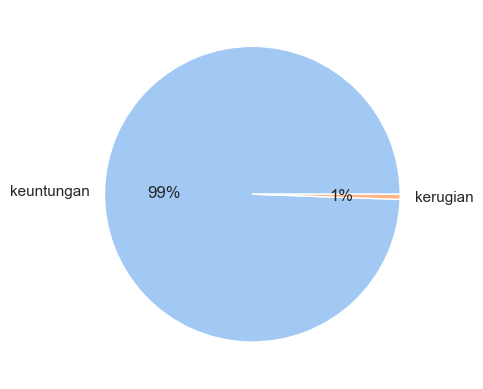

In [250]:
#define data
data = [keuntungan, kerugian]
labels = ['keuntungan', 'kerugian']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Analisa :

dari analisa grafik pie chart terlihat adanya kerugian dikarenakan pemberian 'discount' yang melebihi total dari biaya 'grand_total_new' hanya sebesar 1% dari 99% penjualan.
hanya 22.232.203 ruppe dari 3.925.516.572 Rupee. mungkin dikarenakan barang yang dijual secara merugi adalah barang yang cuci gudang atau bisa di bilang barang yang sudah lama tidak terjual dan ingin penghabisan stock saja. 

## Data Outliers


Disini kita akan memeriksa apakah terdapat outliers pada kolom - kolom data yang berisi nilai numerik

In [254]:
# Membuat fungsi untuk memeriksa outliers
def Cek_Outliers(ecomm_new, col):
    q1 = ecomm_new[col].describe()['25%']
    q3 = ecomm_new[col].describe()['75%']
    iqr = q3 - q1
    upper_fence = q3 + (1.5*iqr)
    lower_fence = q1 - (1.5*iqr)
    ecomm_new_outliers = ecomm_new[(ecomm_new[col] < lower_fence) | (ecomm_new[col] > upper_fence)]
    if len(ecomm_new_outliers) == 0:
        return "No Outliers"
    else:
        return ecomm_new_outliers

In [255]:
# Memeriksa outlier pada kolom `price`
ecomm_new_price = Cek_Outliers(ecomm_new,'price')
ecomm_new_price

,Customer_ID,item_id,status,created_at,sku,category,price,qty_ordered,discount_amount,grand_total_new,sales_commission_code,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,FY,Komisi
8,8,211140,canceled,2016-07-01,Apple iPhone 6S 64GB,Mobiles & Tablets,96499.0,1,0.0,96499.0,None Commission,ublcreditcard,7/1/2016,Gross,"96,499",2016,7,2016-7,FY17,None Commission
9,8,211141,canceled,2016-07-01,Apple iPhone 6S 64GB,Mobiles & Tablets,96499.0,1,0.0,96499.0,None Commission,mygateway,7/1/2016,Gross,"96,499",2016,7,2016-7,FY17,None Commission
31,20,211168,complete,2016-07-01,Samsung Galaxy J5,Mobiles & Tablets,20999.0,1,0.0,20999.0,R-FSD-58130,cod,7/1/2016,Net,"20,999",2016,7,2016-7,FY17,With Commission
60,36,211202,order_refunded,2016-07-01,Eco Star_40U557,Entertainment,30417.0,1,0.0,30417.0,c-uet-44938,cod,7/1/2016,Valid,"30,417",2016,7,2016-7,FY17,With Commission
63,38,211204,complete,2016-07-01,Orient_OR-6057 GX LGFD LV,Appliances,45250.0,1,0.0,45250.0,R-KHS-104405,cod,7/1/2016,Net,"45,250",2016,7,2016-7,FY17,With Commission
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584497,115323,905179,pending,2018-08-28,APPCHA5AF14939B8F8A,Appliances,44199.0,1,0.0,44199.0,None Commission,Easypay,8/28/2018,Valid,"44,199",2018,8,2018-8,FY19,None Commission
584520,115326,905205,pending,2018-08-28,MATHUA5AF70A7D1E50A,Mobiles & Tablets,35599.0,1,0.0,35599.0,None Commission,bankalfalah,8/28/2018,Gross,"35,599",2018,8,2018-8,FY19,None Commission
584521,113474,905206,pending,2018-08-28,MATSAM5B6D7208C6D30,Mobiles & Tablets,129999.0,2,0.0,259998.0,None Commission,bankalfalah,8/28/2018,Gross,"259,998",2018,8,2018-7,FY19,None Commission
584522,113474,905207,pending,2018-08-28,MATSAM5B1509B4696EA,Mobiles & Tablets,87300.0,2,0.0,174600.0,None Commission,bankalfalah,8/28/2018,Gross,"174,600",2018,8,2018-7,FY19,None Commission


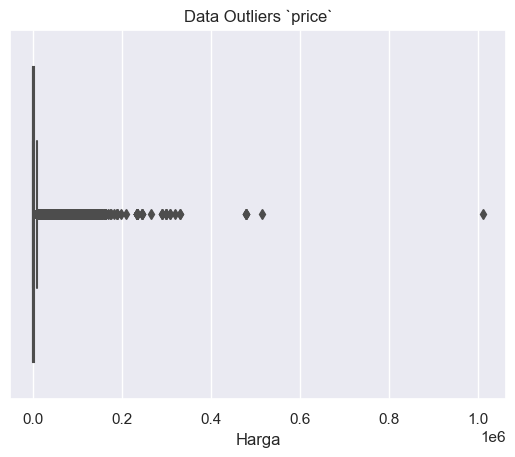

In [256]:
# Mencetak diagram kotak garis dengan 'price' sebagai sumbu x nya
sns.boxplot(data=ecomm_new, x='price')
plt.title('Data Outliers `price`')
plt.xlabel('Harga')
plt.show()

In [260]:
Mindf_outliers_price=ecomm_new_price['price'].min()
Maxdf_outliers_price=ecomm_new_price['price'].max()
print(f'Terdapat outlier pada kolom data `price` dengan nilai kurang dari sama dengan {Mindf_outliers_price} dan lebih dari sama dengan {Maxdf_outliers_price}')

Terdapat outlier pada kolom data `price` dengan nilai kurang dari sama dengan 9650.0 dan lebih dari sama dengan 1012625.9


Dari grafik diatas dapat dilihat bahwa terdapat outliers dengaan nilai harga diatas 1012625.9, namun nilai - nilai tersebut terbilang wajar untuk sebuah item sehingga tidak perlu dilakukan manipulasi lebih lanjut

In [261]:
# Memeriksa outlier pada kolom `qty_ordered`
ecomm_outliers_qty = Cek_Outliers(ecomm_new,'qty_ordered')
ecomm_outliers_qty

,Customer_ID,item_id,status,created_at,sku,category,price,qty_ordered,discount_amount,grand_total_new,sales_commission_code,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,FY,Komisi
4,5,211136,order_refunded,2016-07-01,BK7010400AG,Soghaat,555.0,2,0.0,1110.0,None Commission,cod,7/1/2016,Valid,"1,110",2016,7,2016-7,FY17,None Commission
28,16,211163,complete,2016-07-01,SKMT_Medicine,Others,100.0,5,0.0,500.0,None Commission,customercredit,7/1/2016,Net,500,2016,7,2016-7,FY17,None Commission
29,18,211164,canceled,2016-07-01,sputnik_701/5-11,Men's Fashion,1500.0,2,0.0,3000.0,None Commission,cod,7/1/2016,Gross,"3,000",2016,7,2016-7,FY17,None Commission
48,28,211188,canceled,2016-07-01,RS_Sohan Halwa Tin,Soghaat,300.0,2,0.0,600.0,None Commission,cod,7/1/2016,Gross,600,2016,7,2016-7,FY17,None Commission
49,28,211189,canceled,2016-07-01,UK_Soan Papdi Original 250 Gms,Soghaat,150.0,2,0.0,300.0,None Commission,cod,7/1/2016,Gross,300,2016,7,2016-7,FY17,None Commission
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584490,67966,905170,pending,2018-08-28,BAGPAR5AE95DB431B61,Beauty & Grooming,520.0,2,0.0,1040.0,None Commission,Payaxis,8/28/2018,Valid,"1,040",2018,8,2017-11,FY19,None Commission
584516,8123,905199,pending,2018-08-28,MATINF59BAB39FDBEF1,Mobiles & Tablets,6760.0,2,0.0,13520.0,None Commission,jazz,8/28/2018,Gross,"13,520",2018,8,2016-9,FY19,None Commission
584521,113474,905206,pending,2018-08-28,MATSAM5B6D7208C6D30,Mobiles & Tablets,129999.0,2,0.0,259998.0,None Commission,bankalfalah,8/28/2018,Gross,"259,998",2018,8,2018-7,FY19,None Commission
584522,113474,905207,pending,2018-08-28,MATSAM5B1509B4696EA,Mobiles & Tablets,87300.0,2,0.0,174600.0,None Commission,bankalfalah,8/28/2018,Gross,"174,600",2018,8,2018-7,FY19,None Commission


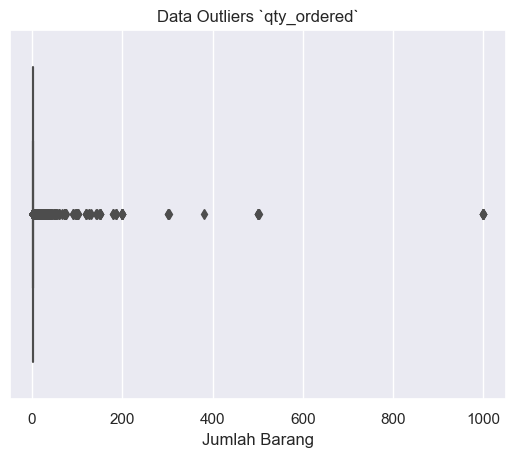

In [262]:
# Mencetak diagram kotak garis dengan 'qty_ordered' sebagai sumbu x nya
sns.boxplot(data=ecomm_new, x='qty_ordered')
plt.title('Data Outliers `qty_ordered`')
plt.xlabel('Jumlah Barang')
plt.show()

In [264]:
Mindf_outliers_qty=ecomm_new_price['qty_ordered'].min()
Maxdf_outliers_qty=ecomm_new_price['qty_ordered'].max()
print(f'Terdapat outlier pada kolom data `qty_ordered` dengan nilai kurang dari sama dengan {Mindf_outliers_qty} dan lebih dari sama dengan {Maxdf_outliers_qty}')

Terdapat outlier pada kolom data `qty_ordered` dengan nilai kurang dari sama dengan 1 dan lebih dari sama dengan 34


Dari grafik diatas dapat dilihat bahwa terdapat outliers dengaan jumlah item setiap transaksi lebih dari 34, namun jumlah tersebut terbilang wajar untuk sebuah transaksi sehingga tidak perlu dilakukan manipulasi lebih lanjut

In [265]:
# Memeriksa outlier pada kolom `grand_total_new`
ecomm_outliers_total = Cek_Outliers(ecomm_new,'grand_total_new')
ecomm_outliers_total

,Customer_ID,item_id,status,created_at,sku,category,price,qty_ordered,discount_amount,grand_total_new,sales_commission_code,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,FY,Komisi
8,8,211140,canceled,2016-07-01,Apple iPhone 6S 64GB,Mobiles & Tablets,96499.0,1,0.0,96499.0,None Commission,ublcreditcard,7/1/2016,Gross,"96,499",2016,7,2016-7,FY17,None Commission
9,8,211141,canceled,2016-07-01,Apple iPhone 6S 64GB,Mobiles & Tablets,96499.0,1,0.0,96499.0,None Commission,mygateway,7/1/2016,Gross,"96,499",2016,7,2016-7,FY17,None Commission
31,20,211168,complete,2016-07-01,Samsung Galaxy J5,Mobiles & Tablets,20999.0,1,0.0,20999.0,R-FSD-58130,cod,7/1/2016,Net,"20,999",2016,7,2016-7,FY17,With Commission
60,36,211202,order_refunded,2016-07-01,Eco Star_40U557,Entertainment,30417.0,1,0.0,30417.0,c-uet-44938,cod,7/1/2016,Valid,"30,417",2016,7,2016-7,FY17,With Commission
63,38,211204,complete,2016-07-01,Orient_OR-6057 GX LGFD LV,Appliances,45250.0,1,0.0,45250.0,R-KHS-104405,cod,7/1/2016,Net,"45,250",2016,7,2016-7,FY17,With Commission
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584516,8123,905199,pending,2018-08-28,MATINF59BAB39FDBEF1,Mobiles & Tablets,6760.0,2,0.0,13520.0,None Commission,jazz,8/28/2018,Gross,"13,520",2018,8,2016-9,FY19,None Commission
584520,115326,905205,pending,2018-08-28,MATHUA5AF70A7D1E50A,Mobiles & Tablets,35599.0,1,0.0,35599.0,None Commission,bankalfalah,8/28/2018,Gross,"35,599",2018,8,2018-8,FY19,None Commission
584521,113474,905206,pending,2018-08-28,MATSAM5B6D7208C6D30,Mobiles & Tablets,129999.0,2,0.0,259998.0,None Commission,bankalfalah,8/28/2018,Gross,"259,998",2018,8,2018-7,FY19,None Commission
584522,113474,905207,pending,2018-08-28,MATSAM5B1509B4696EA,Mobiles & Tablets,87300.0,2,0.0,174600.0,None Commission,bankalfalah,8/28/2018,Gross,"174,600",2018,8,2018-7,FY19,None Commission


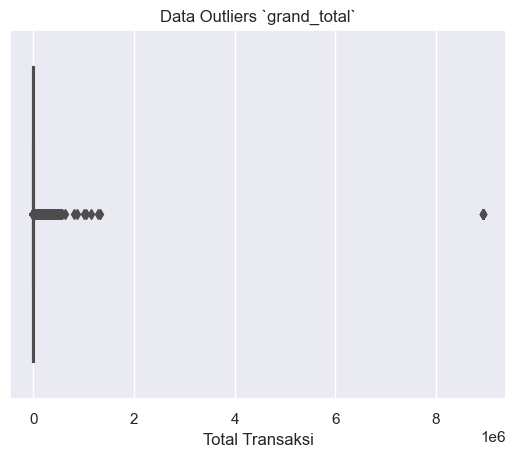

In [266]:
# Mencetak diagram kotak garis dengan 'price' sebagai sumbu x nya
sns.boxplot(data=ecomm_new, x='grand_total_new')
plt.title('Data Outliers `grand_total`')
plt.xlabel('Total Transaksi')
plt.show()

In [268]:
Mindf_outliers_total=ecomm_new_price['grand_total_new'].min()
Maxdf_outliers_total=ecomm_new_price['grand_total_new'].max()
print(f'Terdapat outlier pada kolom data `grand_total` dengan nilai kurang dari sama dengan {Mindf_outliers_total} dan lebih dari sama dengan {Maxdf_outliers_total}')

Terdapat outlier pada kolom data `grand_total` dengan nilai kurang dari sama dengan -6409.07 dan lebih dari sama dengan 1315875.0


Dari grafik diatas dapat dilihat bahwa terdapat outliers dengaan total transaksi lebih dari 1315875.0, namun total transaksi tersebut terbilang wajar untuk sebuah transaksi sehingga tidak perlu dilakukan manipulasi lebih lanjut

## Statistika

pada analisa statistika capstone modul 2 ini hanya dibutuhkan analisa statistika deskriptif saja untuk pengolahan data.

### Analisa Statistika Deskriptif untuk data Numerikal

Analisa statistika deskriptif untuk data numerikal terbagi menjadi 2 yaitu pengukuran tendency sentral dan pengukuran variability

### 1. Pengukuran Tendency Sentral

Dilakukan untuk mengetahui mean, median, dan modus dari data numerikal

Dengan fungsi data.describe langsung dapat diketahui mean, dan median/nilai tengah dari data tersebut

In [88]:
ecomm_new.describe().T[['mean', '50%']]

,mean,50%
price,6348.820623,899.0
qty_ordered,1.296375,1.0
discount_amount,499.502175,0.0
grand_total_new,6677.840132,937.5
Year,2017.044097,2017.0
Month,7.167746,7.0


MODUS

In [89]:
modus_price = ecomm_new['price'].mode()[0]
modus_qty_ordered = ecomm_new['qty_ordered'].mode()[0]
modus_grand_total = ecomm_new['grand_total_new'].mode()[0]
modus_discount_amount = ecomm_new['discount_amount'].mode()[0]
print('MODUS dari data')
print('-'*27)
print('modus_price :', modus_price)
print('modus_qty_ordered :', modus_qty_ordered)
print('modus_grand_total:', modus_grand_total)
print('modus_discount_amount:', modus_discount_amount)

MODUS dari data
---------------------------
modus_price : 1000.0
modus_qty_ordered : 1
modus_grand_total: 999.0
modus_discount_amount: 0.0


### 2. Pengukuran Variabilitas

Dilakukan untuk mengetahui range data, standar deviasi, dan IQR dari data numerikal

Untuk range data dapat diketahui dari kodingan di bawah ini

In [90]:
range_price = ecomm_new['price'].max()-ecomm_new['price'].min()
range_qty_ordered =ecomm_new['qty_ordered'].max()-ecomm_new['qty_ordered'].min()
range_grand_total =ecomm_new['grand_total_new'].max()-ecomm_new['grand_total_new'].min()
range_discount_amount =ecomm_new['discount_amount'].max()-ecomm_new['discount_amount'].min()
print('Besarnya range dari data')
print('-'*50)
print('range_price :', range_price)
print('range_qty_ordered :', range_qty_ordered)
print('range_grand_total:', range_grand_total)
print('range_discount_amount:', range_discount_amount)

Besarnya range dari data
--------------------------------------------------
range_price : 1012625.9
range_qty_ordered : 999
range_grand_total: 8959410.0
range_discount_amount: 90899.5


Melihat standar deviasi

In [91]:
ecomm_new.describe().T[['std']]

,std
price,14949.395345
qty_ordered,3.996094
discount_amount,1506.955668
grand_total_new,33651.630301
Year,0.707349
Month,3.486270


Untuk IQR data dapat diketahui dari kodingan di bawah ini

In [92]:
IQR_price = ecomm_new.describe()['price']['75%']-ecomm_new.describe()['price']['25%']
IQR_qty_ordered =ecomm_new.describe()['qty_ordered']['75%']-ecomm_new.describe()['qty_ordered']['25%']
IQR_grand_total =ecomm_new.describe()['grand_total_new']['75%']-ecomm_new.describe()['grand_total_new']['25%']
IQR_discount_amount =ecomm_new.describe()['discount_amount']['75%']-ecomm_new.describe()['discount_amount']['25%']
print('Besarnya IQR dari data')
print('-'*50)
print('IQR_price :', IQR_price)
print('IQR_qty_ordered :', IQR_qty_ordered)
print('IQR_grand_total:', IQR_grand_total)
print('IQR_discount_amount:', IQR_discount_amount)

Besarnya IQR dari data
--------------------------------------------------
IQR_price : 3710.0
IQR_qty_ordered : 0.0
IQR_grand_total: 4150.0
IQR_discount_amount: 160.52


### Analisa Statistika Deskriptif untuk data Kategorikal

Dilakukan untuk mengetahui count, unique, top, dan freq dari data

In [93]:
ecomm_new.describe(include='O')

,Customer_ID,item_id,status,sku,category,sales_commission_code,payment_method,Working_Date,BI_Status,MV,Customer_Since,FY
count,584513,584513,584513,584513,584513,584513,584513,584513,584513,584513,584513,584513
unique,115326,584513,4,84888,15,7226,14,789,3,9720,26,3
top,85775,211131,complete,MATSAM59DB75ADB2F80,Mobiles & Tablets,None Commission,cod,11/25/2016,Net,999,2016-11,FY18
freq,2524,1,313837,3775,117223,476165,272687,15169,234178,9515,82714,306872


## BUSINESS QUESTION, ANALISIS DAN REKOMENDASI

Setelah dilakukan cleaning data, kita dapat melakukan analisis untuk mencari tahu bagaimana performa penjualan pada eCommerce terbesar di Pakistan dengan menjawab beberapa pertanyaan dibawah.

### 1. Bagaimana rata-rata dari total penjualan setiap bulannya ( dari bulan Juli 2016 sampai dengan Agustus 2018)?

In [94]:
salesmonth = pd.DataFrame(ecomm_new.groupby(['Year','Month'])['grand_total_new'].mean())
salesmonth

grand_total_new
Year Month                 
2016 7      3980.570815    
     8      3713.885492    
     9      4931.493689    
     10     5774.920491    
     11     2954.805329    
     12     5533.428111    
2017 1      7495.691471    
     2      5834.850385    
     3      5366.759874    
     4      5416.854878    
     5      5260.296330    
     6      5858.081492    
     7      2693.348926    
     8      3473.153153    
     9      5992.962882    
     10     5615.497770    
     11     7978.303402    
     12     3978.486583    
2018 1      5241.938862    
     2      9518.619493    
     3      8663.439071    
     4      6628.356903    
     5      13519.037299   
     6      13866.054564   
     7      18979.833568   
     8      9882.216156

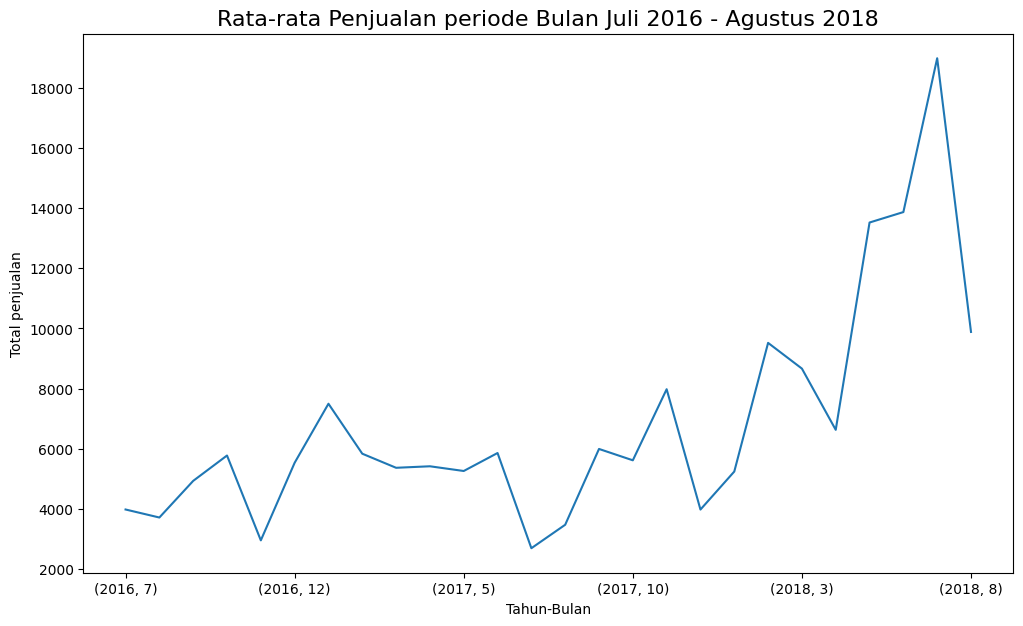

In [95]:
salesmonth = ecomm_new.groupby(['Year','Month'])['grand_total_new'].mean()
plt.figure(figsize=(12,7))
salesmonth.plot(x=['Month','Year'],y='grand_total_new', kind='line') 
plt.title('Rata-rata Penjualan periode Bulan Juli 2016 - Agustus 2018', size=16)
plt.xlabel('Tahun-Bulan')
plt.ylabel('Total penjualan')
plt.savefig('Lineplot_rata-rata_penjualan_juli_2016-Ags_2018.png')
plt.show()

#### Analisis: 
Berdasarkan grafik diatas secara umum terlihat bahwa penjualan pada ecommerce di Pakistan mengalami pertumbuhan dari tahun 2016 hingga 2018. karena pada faktanya di Pakistan e-commerce ini baru booming beberapa tahun terakhir, sehingga pada tahun tersebut pertumbuhan penjualan di ecommerce belum begitu terlihat signifikan.

 
'faktanya ada total 344 pedagang e- niaga di negara tersebut yang terdaftar di bank pada akhir tahun 2016. Pada akhir tahun 2017, jumlah tersebut meningkat menjadi 905. Pertumbuhan ini dibarengi dengan lonjakan transaksi e- commerce dari para pedagang tersebut dari Rs3,9 miliar dalam tiga bulan terakhir tahun 2016 menjadi Rs9,1 miliar dalam tiga bulan terakhir tahun sebelumnya.'

source: "Pakistan’s booming e-commerce market is just getting started" https://www.dawn.com/news/1397446 

#### Rekomendasi :

Pertama yang paling penting untuk menarik banyak pengguna aplikasi kita wajib membuat tampilan aplikasi menjadi lebih menarik dan easy to use dalam segi User Interface dan User Experience. dikarenakan mayoritas sebesar 64% penduduk Pakistan di bawah umur 30 tahun dan sudah  lebih terbuka terhadap teknologi informasi dan komunikasi (Pakistan Goverment, 2019).

Source : Government of Pakistan Ministry of Commerce & Textile (Commerce Division). 2019. E-COMMERCE POLICY FRAMEWORK OF PAKISTAN.

### 2. Bagaimana rata rata total penjualan setiap bulannya?

In [96]:
# Mengurutkan rata-rata total penjualan per bulan

salesmonth = ecomm_new.groupby('Month')['grand_total_new'].mean()
salesmonth = pd.DataFrame(salesmonth).reset_index()
salesmonth

,Month,grand_total_new
0,1,6382.953545
1,2,8391.838531
2,3,7616.021429
3,4,5857.979358
4,5,8936.579169
5,6,9275.790706
6,7,7576.025838
7,8,5101.941977
8,9,5311.075850
9,10,5683.821049


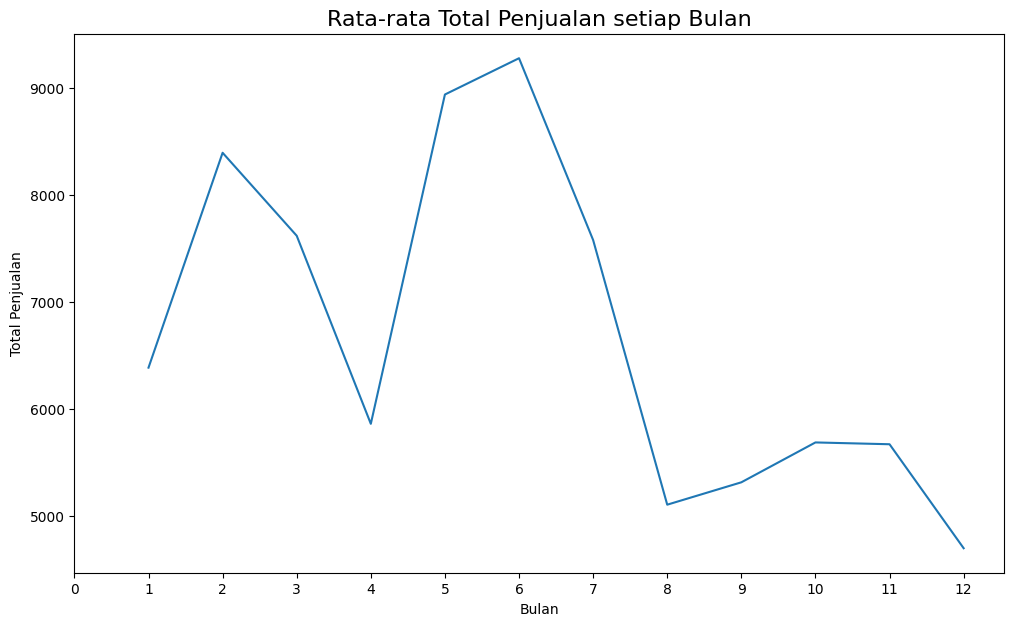

In [97]:
# Visualisasi rata-rata total penjualan per bulan

plt.figure(figsize=(12,7))
sns.lineplot(data=ecomm_new,x='Month',y='grand_total_new', estimator='mean', ci=None) 
plt.xticks(np.arange(13))
plt.title('Rata-rata Total Penjualan setiap Bulan', size=16)
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.savefig('Lineplot_rata-rata_penjualan_setiap_bulan.png')
plt.show()


Analisa :  
Berdasarkan grafik diatas terlihat bahwa rata-rata penjualan mengalami kenaikan pada bulan ke 2 (Februari) namun terjadi penurunan kembali hingga bulan ke-4 (April), kemudian terjadi tren naik dimana puncak penjualan tertinggi berada pada bulan ke-6 (Juni) yang mana pada saat bulan Juni bertepatan dengan bulan Puasa dimana penduduk Pakistan banyak yang berbelanja persiapan Hari Raya Idul Fitri. Setelah bulan Juni terjadi penurunan penjualan hingga bulan terakhir (bulan Desember).

Rekomendasi :  
untuk meningkatkan penjualan setiap bulannya kita harus banyak melakukan promosi, yaitu di:
- seasonal : Idul Fitri, Natal, Waisak, Nyepi, Dll (Agama lain yang ada di Pakistan adalah Kristen, Hindu, Buddha, Jainisme, Zoroastrianisme, dan Baha'i)
- monthly : 1.1( tanggal 1 bulan 1 tiap tahunnya),2.2,3.3 dan seterusnya
- event : Independence day, black friday, libur nasional, dll

source : wikipedia

In [98]:
# Mengurutkan total penjualan 

salesmonth = pd.crosstab(ecomm_new['Month'],'total',values=ecomm_new['qty_ordered'],colnames=[''], aggfunc='sum',margins='index').reset_index()
salesmonth

,Month,total,All
0,1,31876,31876
1,2,50544,50544
2,3,109622,109622
3,4,50043,50043
4,5,81569,81569
5,6,51319,51319
6,7,47768,47768
7,8,62877,62877
8,9,27133,27133
9,10,36552,36552


Analisis: Berdasarkan hasil analisis dan gambar grafik diatas terlihat bahwa penjualan tertinggi terjadi ketika bulan 11 (Bulan November). Hal ini terjadi karena di Pakistan pada akhir Bulan November terdapat event bernama "Black Friday", sehingga menarik banyak warga Pakistan untuk bergabung ke eCommerce dan meningkatkan penjualan perusahaan eCommerce.

Menurut perusahaan ecommerce di Pakistan menyebutkan bahwa sepertiga dari total transaksi saat Black Friday merupakan pelanggan yang aktif, hal ini memiliki arti bahwa trend Black Friday dapat mengingkatkan penjualan eCommerce di Pakistan.

Source:
https://tribune.com.pk/story/1009343/post-black-friday-in-pakistan-e-commerce-entering-a-new-era

### 3. Pada bulan berapa paling banyak pelanggan bergabung ke ecommerce?

In [99]:
custjoin = ecomm_new['Customer_Since'].value_counts()
custjoin

2016-11    82714
2017-11    70785
2016-7     57069
2016-9     46746
2017-5     35356
2018-3     32052
2018-2     23989
2016-8     21051
2017-8     19088
2017-3     18234
2016-10    17546
2017-4     16826
2018-5     16076
2017-6     15593
2017-10    14618
2017-7     14035
2017-1     12260
2016-12    10638
2017-2     10293
2018-1     9665 
2017-12    8667 
2018-4     7626 
2017-9     7442 
2018-6     6798 
2018-7     5330 
2018-8     4016 
Name: Customer_Since, dtype: int64

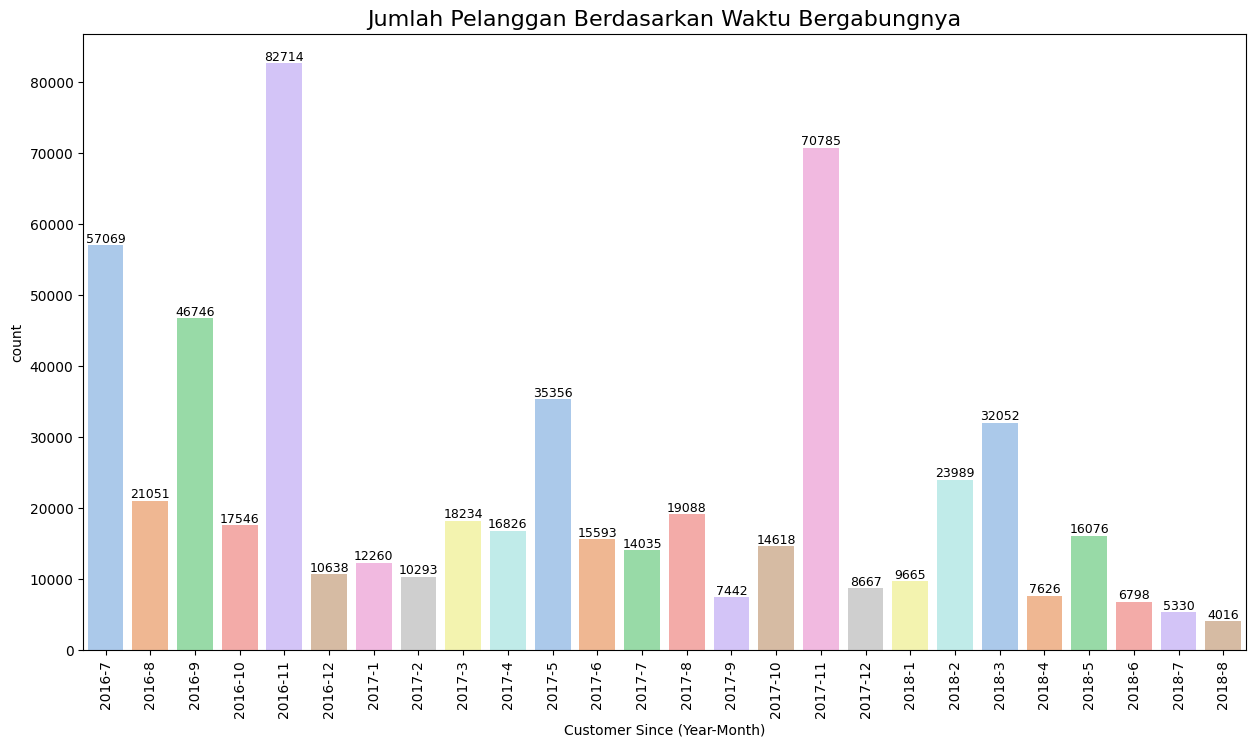

In [100]:
# Visualisasi data customer join ke ecommerce

plt.figure(figsize=(15,8))
custsince = sns.countplot(data = ecomm_new, x = 'Customer_Since', palette='pastel')
custsince.bar_label(custsince.containers[0], size=9)
plt.xticks(np.arange(len(ecomm_new['Customer_Since'].unique())), rotation=90)
plt.title('Jumlah Pelanggan Berdasarkan Waktu Bergabungnya', size=16)
plt.xlabel('Customer Since (Year-Month)')
plt.savefig('Customer_join.png')
plt.show()

Analisa:  
Berdasarkan hasil analisis diatas terlihat bahwa terdapat tren naik setiap bulan 11 (bulan November), artinya Bulan November merupakan bulan dimana paling banyak pelanggan baru bergabung ke eCommerce. Hal ini terjadi karena eCommerce di Pakistan mengadakan 'Black Friday' di akhir Bulan November, dengan adanya event tersebut menarik banyak warga Pakistan untuk bergabung ke eCommerce.

Menurut perusahaan ecommerce di Pakistan menyebutkan bahwa sepertiga dari total transaksi saat Black Friday merupakan pelanggan yang aktif, hal ini memiliki arti bahwa trend Black Friday dapat mengingkatkan penjualan eCommerce di Pakistan.

Source:
https://tribune.com.pk/story/1009343/post-black-friday-in-pakistan-e-commerce-entering-a-new-era

Rekomendasi :  
jangan bergantung pada hari hari besar atau momentum saja tapi ajak pelanggan baru dengan cara memberikan reward pada affiliator eCommerce yang telah berhasil mendatangkan pelanggan untuk berbelanja di eCommerce ini dengan tujuan mendatangkan affiliator-affiliator baru sehingga perusahaan dan affiliator sama-sama diuntungkan. Perusahaan mendapatkan keuntungan promosi/iklan sebagai salah satu strategi pemasaran gratis sehingga meminimalkan cost untuk promosi. Affiliator baru jika berhasil mengiklankan dan memikat konsumen hingga berbelanja di eCommerce ini akan mendapatkan komisi.

### 4. Kategori apa yang menghasilkan penjualan paling banyak?

In [101]:
cat_sales = pd.crosstab(ecomm_new['category'],'Total Penjualan', values=ecomm_new['grand_total_new'],aggfunc='sum', margins=True,colnames=['']).sort_values(by='Total Penjualan',ascending=False).reset_index()
cat_sales

,category,Total Penjualan,All
0,All,3.903284e+09,3.903284e+09
1,Mobiles & Tablets,2.188898e+09,2.188898e+09
2,Appliances,5.606100e+08,5.606100e+08
3,Entertainment,4.788073e+08,4.788073e+08
4,Computing,1.727650e+08,1.727650e+08
5,Others,1.665918e+08,1.665918e+08
6,Women's Fashion,1.024457e+08,1.024457e+08
7,Men's Fashion,8.685499e+07,8.685499e+07
8,Beauty & Grooming,3.914240e+07,3.914240e+07
9,Superstore,3.169606e+07,3.169606e+07


In [102]:
# Total penjualan barang setiap kategori

b = ecomm_new.groupby('category')['grand_total_new'].sum().sort_values(ascending=False)
b = pd.DataFrame(b).reset_index()

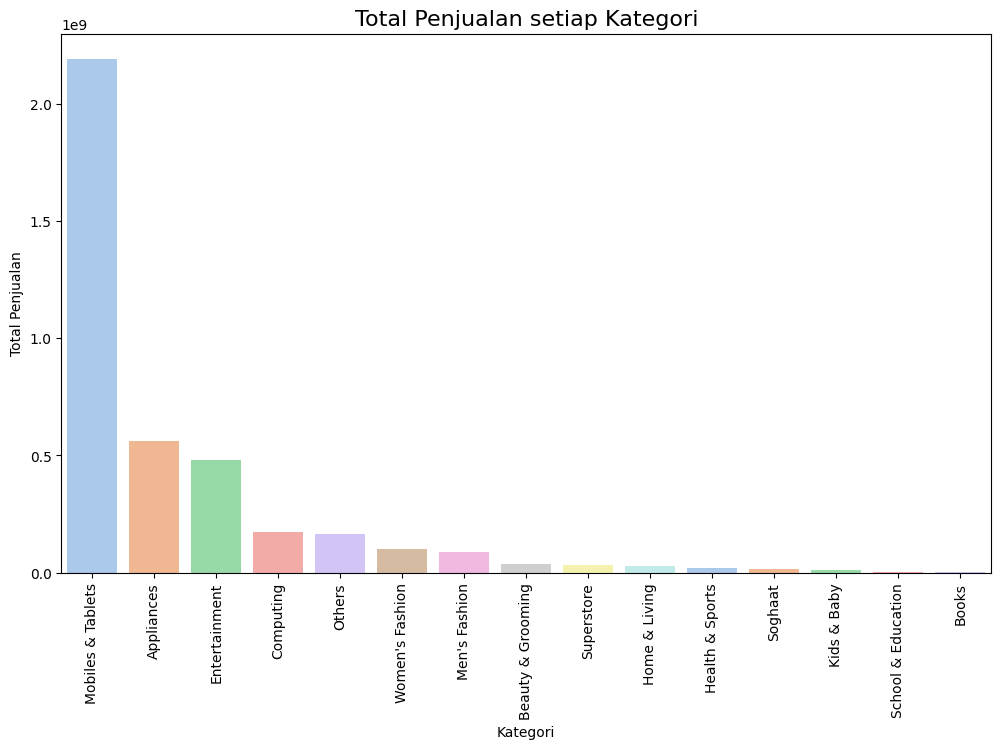

In [103]:
# Visualisasi menggunakan barplot 

plt.figure(figsize=(12,7))  
ax = sns.barplot(data=b, x='category', y='grand_total_new', palette='pastel')
plt.xticks(np.arange(len(ecomm_new['category'].unique())), rotation=90)
plt.xlabel('Kategori')
plt.ylabel('Total Penjualan')
plt.title('Total Penjualan setiap Kategori', size=16)
plt.savefig('Barplot_total_penjualan_setiap_kategori.png')
plt.show()

Analisa:  
Berdasarkan hasil analisis dan visualisasi diatas terlihat bahwa:  

Kategori yang menghasilkan penghasilan tertinggi adalah kategori barang Mobiles & Tablet sekitar 2.1 milyar Ruppee,  
kategori yang menghasilkan penghasilan tertinggi kedua adalah kategori Appliances sekitar 560 juta Ruppee,  
dan kategori yang menghasilkan penghasilan terendah adalah kategori Books, menghasilkan penghasilan hanya sekitar 1 juta rupee.
Alasan mengapa penjualan di ecommerce di Pakistan paling tinggi adalah barang dengan kategori Mobiles & tablets adalah karena pada faktanya penduduk Pakistan membeli barang tersebut secara online karena harga barang tersebut lebih murah dibandingkan dengan membeli langsung ke toko grosir, seperti contohnyadi Saddar (Kota di Pakistan).

source:
Khan, S. Khan., Ahmed, Faisal., Yousuf, Hassan., Hassan, Sohaib ul., & Zia, Syed Abbas. (2014). Online Shoping Behavior in Pakistan. International Conference on Marketing.

Rekomendasi :

bisa dilihat pembelian buku dan School & education merupakan kategori barang dengan jumlah pembelian terendah, sangat jauh lebih rendah dibandingkan dengan yang lainnya. Hal ini sesuai dengan informasi bahwa sepertiga orang Pakistan tidak dapat menulis dan membaca paragraf dalam bahasa apapun. Hal ini juga dapat menjadi potensi bagi pemerintah dan penyedia Ecommerce untuk menjadikan Ecommerce sebagai sumber kampanye untuk meningkatkan minat baca masyarakat Pakistan.jadi menurut saya lakukan cross selling antara produk yang penjualannya besar dengan produk yang penjualannya kecil seperti produk dari category Mobile and Tablets dengan category Books atau Schoool Education. 

### 5. Barang yang paling banyak terjual berasal dari kategori apa?

In [104]:
ecomm_cat = pd.DataFrame(ecomm_new.groupby('category')['qty_ordered'].sum().sort_values(ascending=False)).reset_index()

In [105]:
pd.crosstab(ecomm_new['category'],'jumlah',values=ecomm_new['qty_ordered'],aggfunc='sum', margins='jumlah', colnames=['']).sort_values(by='jumlah',ascending=False)

,jumlah,All
category,,
All,757748,757748
Mobiles & Tablets,134469,134469
Men's Fashion,103406,103406
Others,86129,86129
Superstore,83034,83034
Women's Fashion,65320,65320
Appliances,58867,58867
Beauty & Grooming,55162,55162
Soghaat,48232,48232


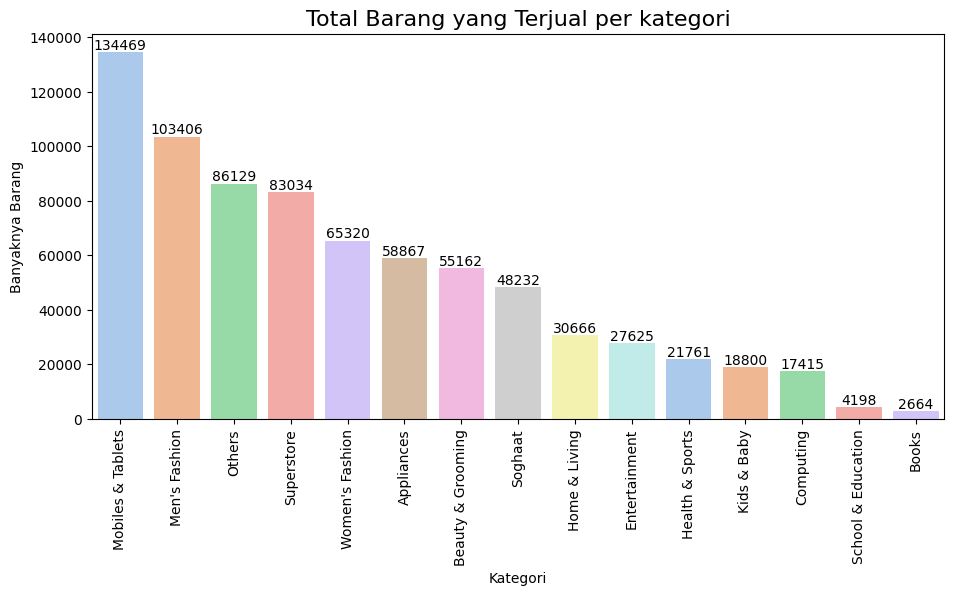

In [106]:
# Visualisasi 
plt.figure(figsize=(11,5))  
ax = sns.barplot(data=ecomm_cat, x='category', y='qty_ordered', palette='pastel')
ax.bar_label(ax.containers[0])
plt.xticks(np.arange(len(ecomm_new['category'].unique())), rotation=90)
plt.xlabel('Kategori')
plt.ylabel('Banyaknya Barang')
plt.title('Total Barang yang Terjual per kategori', size=16)
plt.savefig('Total_barang_yang_terjual_perkategori.png')
plt.show()

Analisa:  
Berdasarkan gambar grafik di atas terlihat bahwa:  

Kategori yang barangnya paling banyak terjual adalah kategori Mobiles & Tablets, yaitu sebanyak 134.469 barang terjual,  
Kategori yang barangnya paling banyak terjual kedua adalah kategori Men's Fashion, yaitu sebanyak 103.406 barang,  
Kategori yang barangnya paling banyak terjual ketiga berasal dari kategori Others, yaitu sebanyak 86.129 barang, dan  
Kategori yang barangnya paling sedikit terjual berasal dari kategori Books, yaitu sebanyak 2.664 barang.  
Alasan mengapa di ecommerce di Pakistan barang yang paling banyak terjual adalah barang dengan kategori Mobiles & tablets karena pada jurnal yang berjudul "Online Shopping Behavior in Pakistan" menjelaskan bahwa terdapat penduduk Pakistan membeli barang handphone dalam 1 tahun hingga 5 kali, hal ini memberikan arti bahwa penduduk Pakistan memang sering membeli HP, sehingga tidak heran jika kategori Mobiles & Tablets menjadi kategori barang yang paling banyak terjual di eCommerce. selain itu, penduduk Pakistan juga memilih berbelanja di eCommerce karena harga barang di eCommerce lebih murah dibandingkan dengan membeli langsung ke toko grosir, seperti contohnya di Saddar (Kota di Pakistan).

source:
Khan, S. Khan., Ahmed, Faisal., Yousuf, Hassan., Hassan, Sohaib ul., & Zia, Syed Abbas. (2014). Online Shoping Behavior in Pakistan. International Conference on Marketing.

Rekomendasi :
untuk memperbanyak penjualan per item di ecommerce juga bisa dengan beberapa cara salah satunya dengan cara upselling, misalnya pembelian 10 Books mendapatkan 1 books. atau pembelian baju di category Mens atau Women Fashion  jumlah yang banyak dapat potongan harga sekian persen. 


### 6. Berapa banyak pelanggan yang menggunakan kode komisi ("Sales commission code")?

In [107]:
# Kita buat kolom baru untuk membagi pelanggan yang memakai kode komisi dengan yang tidak berdasarkan kolom "sales_commission code"
# jika value pada kolom "sales commission code" adalah 'no commission code' artinya pelanggan tersebut tidak menggunakan kode komisi, dan yang lainnya berarti menggunakan kode komisi
salescomm = []
for i in ecomm_new['sales_commission_code']:
    if i == 'None Commission':
        salescomm.append('None Commission')
    else:
        salescomm.append('With Commission')
        
ecomm_new['Komisi'] = salescomm

In [108]:
ecomm_new['Komisi'].value_counts()

None Commission    476165
With Commission    108348
Name: Komisi, dtype: int64

In [109]:
comm = pd.crosstab(ecomm_new['Komisi'],'proporsi',colnames=[''],normalize=True).reset_index()
comm

,Komisi,proporsi
0,None Commission,0.814635
1,With Commission,0.185365


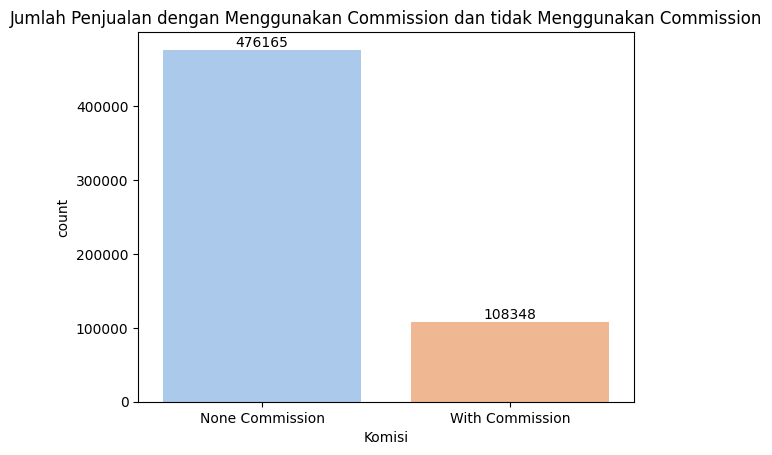

In [110]:
# Visualisasi menggunakan barplot
bx = sns.countplot(data = ecomm_new, x = 'Komisi', palette='pastel')
bx.bar_label(bx.containers[0])
plt.title('Jumlah Penjualan dengan Menggunakan Commission dan tidak Menggunakan Commission')
plt.savefig('Pelanggan_dengan_kode_komisi.png')
plt.show()

Analisa:  
Berdasarkan gambar grafik diatas terlihat bahwa yang berbelanja memakai kode komisi hanya 108.348 atau sebesar 18,5%, sedangkan 81.5% atau sebesar 476.165 nya adalah pelanggan yang berbelanja tidak memakai kode komisi yaitu setara dengan 469.743 pelanggan. bisa di analisa bahwa penjualan dengan commission masih sangat sedikit padahal pada saat ini kita lihat banyak perusahaan ecommerce menggunakan commission untuk meningkatkan penjualan mereka.

Rekomendasi :

selain menggunakan affiliate yang sudah saya jelaskan sebelumnya diatas, ada juga cara lain untuk memboost penjualan dari segi commission yaitu dengan sistem ' Referral' yaitu user bisa mendapatkan point/rewards yang nantinya akan berguna untuk pembelian barang di ecommerce tersebut. 

Dengan referral, artinya akan ada banyak orang yang ikut membeli produk tersebut. Apalagi konsumen cenderung mempercayai rekomendasi dari orang yang mereka kenal.
menurut riset Annex Cloud, referral marketing dapat menghasilkan 3 hingga 5 kali lipat conversion rate, dan berpeluang meningkatkan customer retention 37% lebih tinggi dibandingkan channel marketing lain. Itulah kenapa marketing ini penting untuk digunakan sebagai upaya meningkatkan penjualan. 



### 7. Metode Pembayaran yang paling banyak dipakai?

In [ ]:
paymentmeth = pd.crosstab(ecomm_new['payment_method'],'Jumlah Penjualan',colnames=['']).sort_values(by='Jumlah Penjualan',ascending=False).reset_index()
paymentmeth

,payment_method,Jumlah Penjualan
0,cod,272687
1,Easypay,128099
2,Payaxis,97640
3,jazz,50778
4,bankalfalah,23065
5,customercredit,7555
6,apg,1758
7,ublcreditcard,882
8,mcblite,723
9,mygateway,669


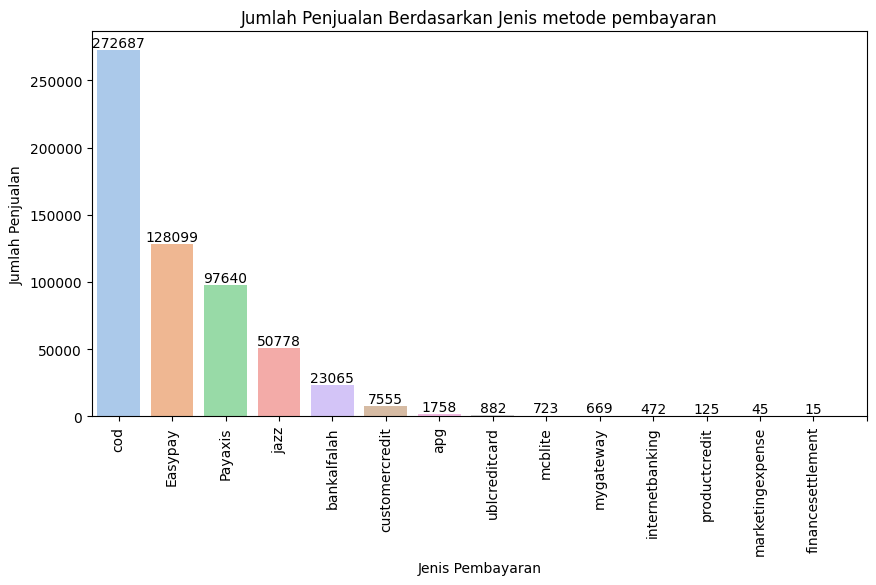

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=paymentmeth, x='payment_method', y= 'Jumlah Penjualan', palette='pastel')
ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
plt.xticks(np.arange(len(ecomm_new['category'].unique())), rotation=90)
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Jumlah Penjualan')
plt.title("Jumlah Penjualan Berdasarkan Jenis metode pembayaran")
plt.savefig('Jumlah_penjualan_berdasarkan_jenis_pembayaran.png')
plt.show()

In [114]:
payment_method_status = pd.crosstab(ecomm_new.payment_method, ecomm_new.status) #margins = True
payment_method_status

status,canceled,complete,order_refunded,pending
payment_method,,,,
Easypay,73452,49787,4531,329
Payaxis,61347,31517,4366,410
apg,1361,332,45,20
bankalfalah,16190,5752,860,263
cod,22136,196136,54389,26
customercredit,71,5891,1492,101
financesettlement,1,9,5,0
internetbanking,290,156,26,0
jazz,25410,23533,1656,179


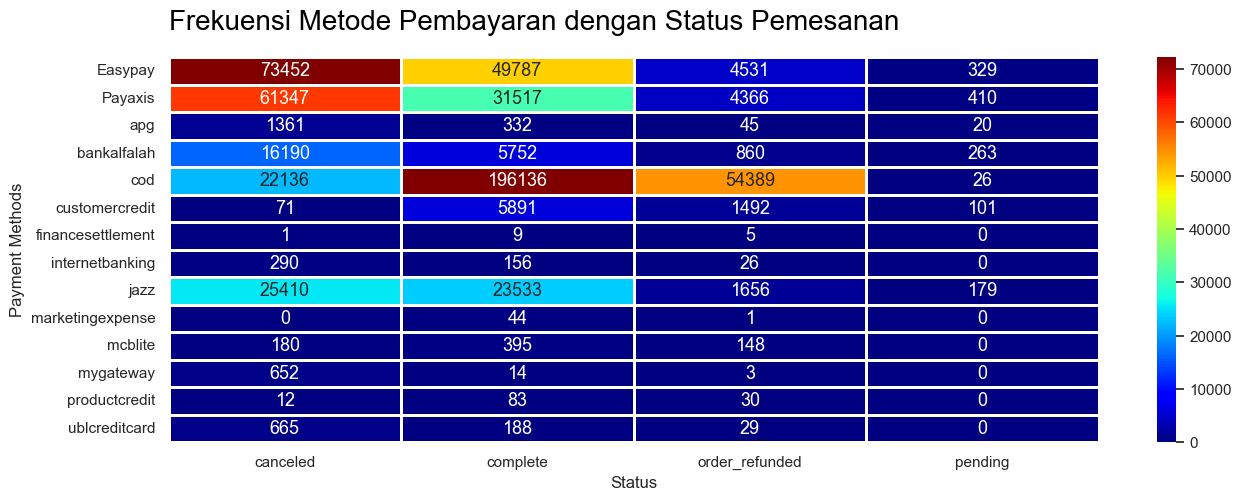

In [115]:
plt.figure(figsize = (15, 5))
sns.set_theme(context = 'notebook', style = 'darkgrid', palette = 'bright', font = 'sans-serif', font_scale = 1, color_codes = True, rc = None)
sns.heatmap(payment_method_status, 
            cmap = 'jet', 
            robust = True, 
            annot = True, 
            annot_kws = {'size':13}, 
            fmt = ".0f", 
            linecolor = 'white', 
            linewidths = 1, 
            cbar = True, 
            square = False,
            xticklabels = True,
            yticklabels = True) 
plt.xlabel("Status")

plt.ylabel("Payment Methods")
plt.text(0,-1, "Frekuensi Metode Pembayaran dengan Status Pemesanan ", fontsize = 20, color = 'Black', fontstyle = 'normal')
plt.show()

Analisa:  
Berdasarkan hasil analisis yang dibantu oleh gambar grafik diatas didapatkan hasil bahwa pelanggan ecommerce di Pakistan kebanyakan menyukai metode pembayaran COD, hal ini didukung oleh fakta bahwa metode pembayaran COD menjadi peran penting untuk mengurangi resiko saat berbelanja online karena dengan metode tersebut pelanggan ingin mencobanya sebelum membayar.

Menurut laporan, 95 persen perusahaan elektronik menerima pembayaran untuk pesanan online mereka melalui cash- on- delivery. Hal ini meningkatkan persyaratan likuiditas untuk perusahaan e- niaga dan juga memaksa mereka untuk memiliki tim khusus yang mengelola penerimaan kas untuk perusahaan, sehingga meningkatkan biaya operasional. Pemain yang lebih besar di ruang e- commerce telah mulai memanfaatkan pembayaran digital, dan optimis bahwa industri ini akan bersatu untuk membujuk konsumen agar beralih dari pembayaran tunai di tempat ke pembayaran online. Pembayaran digital juga merupakan rintangan bagi sektor e- commerce Pakistan. Sementara beberapa produk seperti EasyPaisa, JazzCash, dan uPaisa — yang merupakan mobile bank — tersedia saat ini, tidak ada satupun yang memiliki penetrasi pasar yang tinggi. Ini, ditambah dengan fakta bahwa hanya 24 persen penduduk negara itu yang memiliki rekening bank secara signifikan

source:

Khan, S. Khan., Ahmed, Faisal., Yousuf, Hassan., Hassan, Sohaib ul., & Zia, Syed Abbas. (2014). Online Shoping Behavior in Pakistan. International Conference on Marketing.  
Imtiaz, Shoaib., Ali, Syed Hassan., & Kim, Don Jin. E-Commerce Growth in Pakistan: Privacy, Security, and Trust as Potential Issues. Culinary Science & Hospitality Research 26(2):10-18.  
https://www.trade.gov/country-commercial-guides/pakistan-ecommerce

Rekomendasi :

Bisa dilihat dari analisa diatas bahwa metode pembayaran banyak menggunakan COD, jadi rentan untuk pelanggan return order atau mengembalikan barang( kalau tidak sesuai dengan pelanggan ) bisa di katakan perusahaan akan memberikan banyak biaya untuk pengiriman dan juga rentan untuk loss dalam penyimpanan uang pemabayran karna pembayaran yang di terima adalah uang kas. jadi kita merekomendasikan untuk merubah metode pembayaran atau meminimalisasi pembayaran yang sebelumnya menggunakan COD menjadi pembayaran via online.    

salah satu metode via online bisa menggunakan payment gateway. Payment gateway merupakan sebuah sistem yang dapat mengotorisasi pembayaran yang dilakukan pelanggan di commerce. Sistem ini memungkinkan untuk dapat menerima pembayaran dari berbagai bank dan metode pembayaran, mulai dari kartu kredit/debit, transfer bank, virtual account, gerai ritel, e-wallet, hingga pay later.  
Bukan hanya itu, ada banyak manfaat lain yang dapat Anda peroleh jika menggunakan payment gateway untuk ecommerce.   
Berikut adalah 4 di antaranya:
- Tidak Perlu Memiliki Banyak Rekening Bank
- Meningkatkan Konversi
- Serba Otomatis
- Lebih Cepat dan Aman

### 8. Kategori mana yang menghasilkan Penghasilan terbesar diantara Transaksi yang memiliki diskon

In [116]:
# Bikin dataframe baru yang berisi daftar penjualan yang memiliki discount

trx = ecomm_new
trx = pd.DataFrame(trx)
trx = trx[trx['discount_amount'] != 0.0]

<Figure size 1500x700 with 0 Axes>

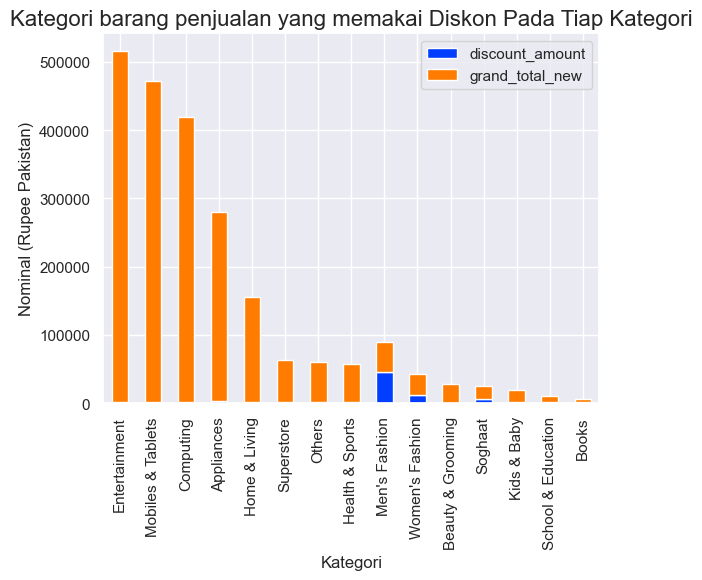

<Figure size 1500x700 with 0 Axes>

In [117]:
# membuat dataframe dari grouping dataframe trx berdasarkan category, diambil nilai maksimum dari 'grand_total_new' dan diurutkan dari yang terbesar
tot = trx.groupby('category')['grand_total_new'].max().sort_values(ascending=False)
tot = pd.DataFrame(tot.reset_index())

# menggabungkan dataframe tot dan trx dengan kolom penghubung 'grand_total_new' dan 'category'
jum = pd.merge(tot, trx, on=['grand_total_new','category'])
jum = jum[['category','grand_total_new','discount_amount']]
jum = jum.drop_duplicates()

jum.set_index('category').plot(kind='bar', stacked=True, y=['discount_amount','grand_total_new'])

plt.xlabel('Kategori' )
plt.ylabel('Nominal (Rupee Pakistan)')
plt.title('Kategori barang penjualan yang memakai Diskon Pada Tiap Kategori', size=16)
plt.savefig('Penghasilan_denga_diskon.png')
plt.figure(figsize=(15,7)) 

Analisa:   
Berdasarkan gambar grafik diatas terlihat bahwa 
- kategori Entertainment kalau dilihat sub category merupakan produk elektronik seperti TV, audio, Monitor, dll. menghasilkan penjualan terbesar sebesar 513.975 Ruppee, meskipun diskon atau potongan harga yang diberikan kecil sebesar total 2000 ruppee, 
- ternyata Mobile & tablets penjualan di urutan 2 sebesar 471.000 Ruppee, dengan total diskon sebesar 1000 Ruppee. 

- untuk pemberian potongan diskon terbesar pertama adalah kategori Mens Fashion menempati urutan ke-9 penjualan terbesar padahal potongan harga yang diberikan sangat besar, sebesar 45.000 Rupee hampir seluruh category mens fashion menggunakan potongan diskon. 
- dan pemberian diskon terbesar kedua yaitu category womens fashion dengan potongan discount sebesar 12.487 Ruppee.
- kenapa category fashion selalu menjadi pilihan untuk pemberian potongan discount di ecommerce karna Tekstil/Pakaian merupakan 57% dari ekspor Pakistan, dan di kancah lokal, pakaian jadi menghasilkan antara 32-35% dalam penjualan industri. jadi pakaian bisa dijual dengan harga murah atau dengan potongan discount yang besar.



Rekomendasi :

untuk discount pada category Mens Fashion dan Female Fashion dapat di minimalisir karena pendapatan penjualan tidak signifikan, bahkan pada category Mens Fashion tidak ada revenue. lebih baik discount di berikan ke category yang penjualannya lebih besar agar bisa lebih meningkatkan penjualan dan pastinya boost revenue juga. dampak pemberian discount pada category lain juga tidak terlalu signifikan, bukti dari analisa diatas adalah pada penjualann entertainment dan mobile & tablets meskipun pemberian discount kecil tetapi penjualan pada kategori tersebut cukup besar. 
untuk strategi pemberian discount yang bisa kita rekomendasikan adalah pemberian diskon pada saat event event besar sperti black friday atau hari besar keagamaan. 
selain itu kita bisa memberikan discount berupa cashback agar pelanggan bisa membeli barang tersebut kembali (churning)

source : https://seller.alibaba.com/businessblogs/px001tae0-10-best-selling-online-products-in-pakistan

### 9. Kategori mana yang menghasilkan melakukan penjualan menggunakan sales commision code

In [118]:
# Bikin dataframe baru yang berisi daftar penjualan yang menggunakan sales commision code

saleswithcomm = ecomm_new
saleswithcomm = pd.DataFrame(saleswithcomm)
saleswithcomm = saleswithcomm[saleswithcomm['sales_commission_code'] != 'None Commision']

In [119]:
# membuat dataframe dari grouping dataframe trx berdasarkan category, diambil nilai maksimum dari 'sales_commission_code'
tot_comm = saleswithcomm.groupby('category')['Komisi'].max().sort_values(ascending=False)

# menggabungkan dataframe tot dan trx dengan kolom penghubung 'grand_total_new' dan 'category'
jum_comm = pd.merge(tot_comm, saleswithcomm, on=['Komisi','category'])
jum_comm = jum_comm[['category','Komisi','grand_total_new']]
tot_comm = pd.DataFrame(tot_comm.reset_index())
jum_comm = jum_comm.drop_duplicates()
jum_comm

,category,Komisi,grand_total_new
0,Appliances,With Commission,45250.0
1,Appliances,With Commission,3600.0
2,Appliances,With Commission,55850.0
3,Appliances,With Commission,42860.0
4,Appliances,With Commission,1335.0
...,...,...,...
108337,Women's Fashion,With Commission,2239.3
108340,Women's Fashion,With Commission,9750.0
108341,Women's Fashion,With Commission,16950.0
108342,Women's Fashion,With Commission,11495.0


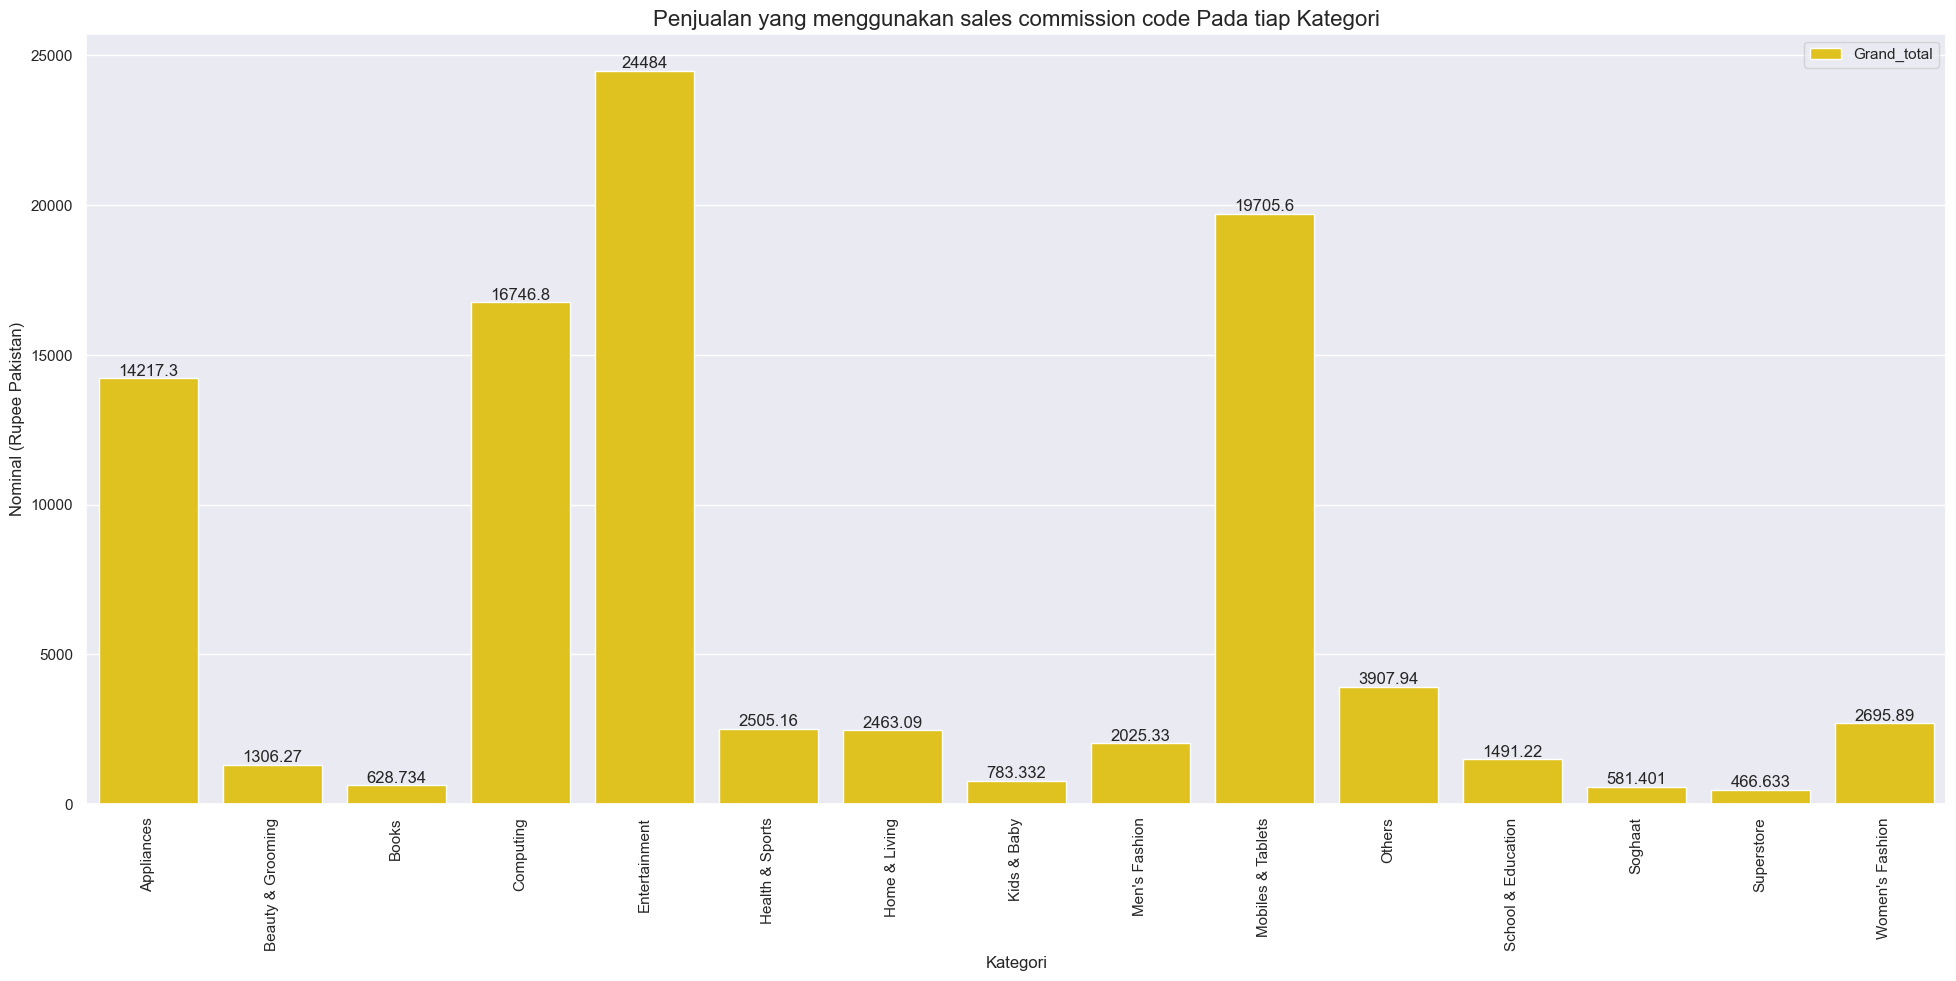

In [127]:
plt.figure(figsize=(24,10))  
ax = sns.barplot(data=jum_comm, x='category', y='grand_total_new', color='gold', label='Grand_total', ci=False)
ax.bar_label(ax.containers[0])
# bx.bar_label(bx.containers[1])
plt.legend()
plt.xticks(np.arange(len(tot['category'].unique())), rotation=90)
plt.xlabel('Kategori' )
plt.ylabel('Nominal (Rupee Pakistan)')
plt.title('Penjualan yang menggunakan sales commission code Pada tiap Kategori', size=16)
plt.savefig('Penghasilan_dengan_scd.png')
plt.show()

Analisa:   
Berdasarkan gambar grafik diatas terlihat bahwa 
- Kategori Entertainment paling banyak penjualan menggunakan sales commission code sebesar 24.484 Ruppee, dikarenakan commission yang besar dalam penjualan di category Entertainment
- disusul Mobile & Tablets di peringkat kedua sebesar 19.705 Ruppee, dan
- Computing di peringkat ketiga terbesar sebesar 16.746 Ruppee
dan Category dengan penjualan dengan komisi terendah adalah
- category Superstore adalah category yang paling sedikit menggunakan komisi yaitu sebesar 466 Ruppee
- disusul category sooghat yaitu 581 Ruppee




Rekomendasi :

agar persebaran komisi pada category lainnya juga meningkat kita bisa lakukan affiliate dengan penjualan per category, dengan kata lain setiap category memiliki affiliate masing- masing agar semua penjualan memiliki commission sales yang pada akhirnya menguntungkan kedua belah pihak antara para affiliate dan tentunya perusahaan. kita tau pada negara pakistan category books dan education sangatlah minim, kita juga bisa boost untuk penjualan yang berkaitan dengan education agar level education pakistan juga bisa ditingkatkan dengan cara memberi edukasi lewat influencer dari bidang pendidikan/kerja sama dengan pihak pemerintah pendidikan. 

#### 10. produk apa yang terjual paling banyak ?

In [128]:
most_sold_cat = pd.DataFrame(ecomm_new.groupby(['sku', 'category']).size().reset_index(name = 'Count'))
top_10_most_sold_cat = most_sold_cat.sort_values(by = 'Count', ascending = False).head(10)
top_10_most_sold_cat.columns = ['Top 10 Most Ordered Products', 'Category', 'Count'] #Renaming Columns
top_10_most_sold_cat

,Top 10 Most Ordered Products,Category,Count
38781,MATSAM59DB75ADB2F80,Mobiles & Tablets,3775
5514,Al Muhafiz Sohan Halwa Almond,Soghaat,2258
76305,emart_00-7,Home & Living,2027
78514,kcc_krone deal,Beauty & Grooming,1895
77689,infinix_Zero 4-Grey,Mobiles & Tablets,1793
38770,MATSAM59DB757FB47A2,Mobiles & Tablets,1273
55420,Rubian_U8 Smart Watch,Mobiles & Tablets,1233
84827,unilever_Deal-6,Superstore,1213
3260,APPNAT5A0A01860CE92,Appliances,1173
39003,MATSAM5A7463EE3C1A5,Mobiles & Tablets,1171


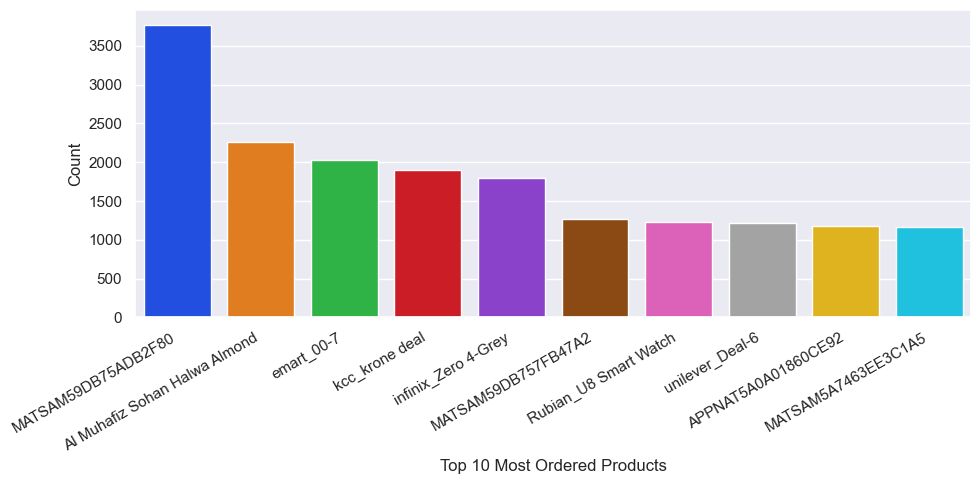

In [129]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x = top_10_most_sold_cat['Top 10 Most Ordered Products'], y = top_10_most_sold_cat['Count'], data = top_10_most_sold_cat)

# add Labels
ax.set(xlabel = "Top 10 Most Ordered Products")
ax.set(ylabel = 'Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, horizontalalignment = 'right')
plt.tight_layout()
plt.show()

Analisis : 

Berdasarkan grafik penjualan barang terbanyak nomor 1 dari kategori Mobile & Tablets yaitu MATSAM569DB75ADB2F80 dari analisa saya itu barang elekronik berupa handphone samsung, terjual sebanyak 3775 pcs. diikuti produk dari kategori Sooghat yaitu Al Muhafiz Sohan Halwa Almond, yaitu sejenis kue dengan toping almond terjual sebanyak 2258 pcs.
faktanya memang pada tahun 2016-2018 penjualan mobile  atau smartphone di dunia sedang meningkat drastis.

source : https://www.statista.com/statistics/263437/global-smartphone-sales-to-end-users-since-2007/

Rekomendasi :  
strategi khususnya untuk penjualan di kategori mobile and tablet yaitu selalu mengerti apa permintaan pasar, jual produk yang sedang diminati saja, minimalisir produk yang kurang di minati pasar. karena fakta nya rata rata pengguna smartphone selalu mengganti smartphone mereka dalam waktu kurang dari 3 tahun.

source : https://www.gsmarena.com/weekly_poll_how_long_will_you_keep_your_phone-news-44070.php


In [130]:
ecomm_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584513 entries, 0 to 584523
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer_ID            584513 non-null  object        
 1   item_id                584513 non-null  object        
 2   status                 584513 non-null  object        
 3   created_at             584513 non-null  datetime64[ns]
 4   sku                    584513 non-null  object        
 5   category               584513 non-null  object        
 6   price                  584513 non-null  float64       
 7   qty_ordered            584513 non-null  int32         
 8   discount_amount        584513 non-null  float64       
 9   grand_total_new        584513 non-null  float64       
 10  sales_commission_code  584513 non-null  object        
 11  payment_method         584513 non-null  object        
 12  Working_Date           584513 non-null  object   

In [ ]:
# ecomm_new.to_excel('pakistan_adhitia.xlsx')